In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
import seaborn as sns
import time
from datetime import datetime
from pytz import timezone
from statsmodels.distributions.empirical_distribution import ECDF

In [2]:
df = pd.read_csv("Forecast.csv",parse_dates=True)

In [3]:
df.tail()

,product,date,city,sales
4795,SECF,11-01-2017,Delhi,5837
4796,SECF,12-01-2017,Delhi,7451
4797,SECF,01-01-2018,Delhi,7712
4798,SECF,02-01-2018,Delhi,31525
4799,SECF,03-01-2018,Delhi,36136


In [4]:
df['Date'] = pd.to_datetime(df['date'])

In [5]:
#df = df[df.Date < pd.to_datetime('2018-01-01')]

In [6]:
df.tail()

,product,date,city,sales,Date
4795,SECF,11-01-2017,Delhi,5837,2017-11-01
4796,SECF,12-01-2017,Delhi,7451,2017-12-01
4797,SECF,01-01-2018,Delhi,7712,2018-01-01
4798,SECF,02-01-2018,Delhi,31525,2018-02-01
4799,SECF,03-01-2018,Delhi,36136,2018-03-01


In [7]:
df.tail()

,product,date,city,sales,Date
4795,SECF,11-01-2017,Delhi,5837,2017-11-01
4796,SECF,12-01-2017,Delhi,7451,2017-12-01
4797,SECF,01-01-2018,Delhi,7712,2018-01-01
4798,SECF,02-01-2018,Delhi,31525,2018-02-01
4799,SECF,03-01-2018,Delhi,36136,2018-03-01


In [8]:
df.head()

,product,date,city,sales,Date
0,Mixers,04-01-2014,Mumbai,2679347,2014-04-01
1,Mixers,05-01-2014,Mumbai,3864612,2014-05-01
2,Mixers,06-01-2014,Mumbai,2932658,2014-06-01
3,Mixers,07-01-2014,Mumbai,3703713,2014-07-01
4,Mixers,08-01-2014,Mumbai,3931029,2014-08-01


In [9]:
df.head(50)

,product,date,city,sales,Date
0,Mixers,04-01-2014,Mumbai,2679347,2014-04-01
1,Mixers,05-01-2014,Mumbai,3864612,2014-05-01
2,Mixers,06-01-2014,Mumbai,2932658,2014-06-01
3,Mixers,07-01-2014,Mumbai,3703713,2014-07-01
4,Mixers,08-01-2014,Mumbai,3931029,2014-08-01
5,Mixers,09-01-2014,Mumbai,4677008,2014-09-01
6,Mixers,10-01-2014,Mumbai,4331662,2014-10-01
7,Mixers,11-01-2014,Mumbai,2184730,2014-11-01
8,Mixers,12-01-2014,Mumbai,4131878,2014-12-01
9,Mixers,01-01-2015,Mumbai,4043952,2015-01-01


In [10]:
df.set_index('Date',inplace=True)
df.head()

,product,date,city,sales
Date,,,,
2014-04-01,Mixers,04-01-2014,Mumbai,2679347
2014-05-01,Mixers,05-01-2014,Mumbai,3864612
2014-06-01,Mixers,06-01-2014,Mumbai,2932658
2014-07-01,Mixers,07-01-2014,Mumbai,3703713
2014-08-01,Mixers,08-01-2014,Mumbai,3931029


In [11]:
df.tail()

,product,date,city,sales
Date,,,,
2017-11-01,SECF,11-01-2017,Delhi,5837
2017-12-01,SECF,12-01-2017,Delhi,7451
2018-01-01,SECF,01-01-2018,Delhi,7712
2018-02-01,SECF,02-01-2018,Delhi,31525
2018-03-01,SECF,03-01-2018,Delhi,36136


In [12]:
GS_Mum1= df[(df['city'] == 'Mumbai') & (df['product'] == 'Gas Stove')]

In [13]:
GS_Mum1.tail()

,product,date,city,sales
Date,,,,
2017-11-01,Gas Stove,11-01-2017,Mumbai,1079786
2017-12-01,Gas Stove,12-01-2017,Mumbai,1497683
2018-01-01,Gas Stove,01-01-2018,Mumbai,2116298
2018-02-01,Gas Stove,02-01-2018,Mumbai,1025850
2018-03-01,Gas Stove,03-01-2018,Mumbai,774517


In [14]:
GS_Mum1.shape

(48, 4)

In [15]:
GS_Mum= GS_Mum1.drop('date', axis = 1)

In [16]:
GS_Mum.head()

,product,city,sales
Date,,,
2014-04-01,Gas Stove,Mumbai,526894
2014-05-01,Gas Stove,Mumbai,759977
2014-06-01,Gas Stove,Mumbai,576708
2014-07-01,Gas Stove,Mumbai,728336
2014-08-01,Gas Stove,Mumbai,773037


In [17]:
# The following code is to set the subsequent figure sizes

from pylab import rcParams
rcParams['figure.figsize'] = 20,8

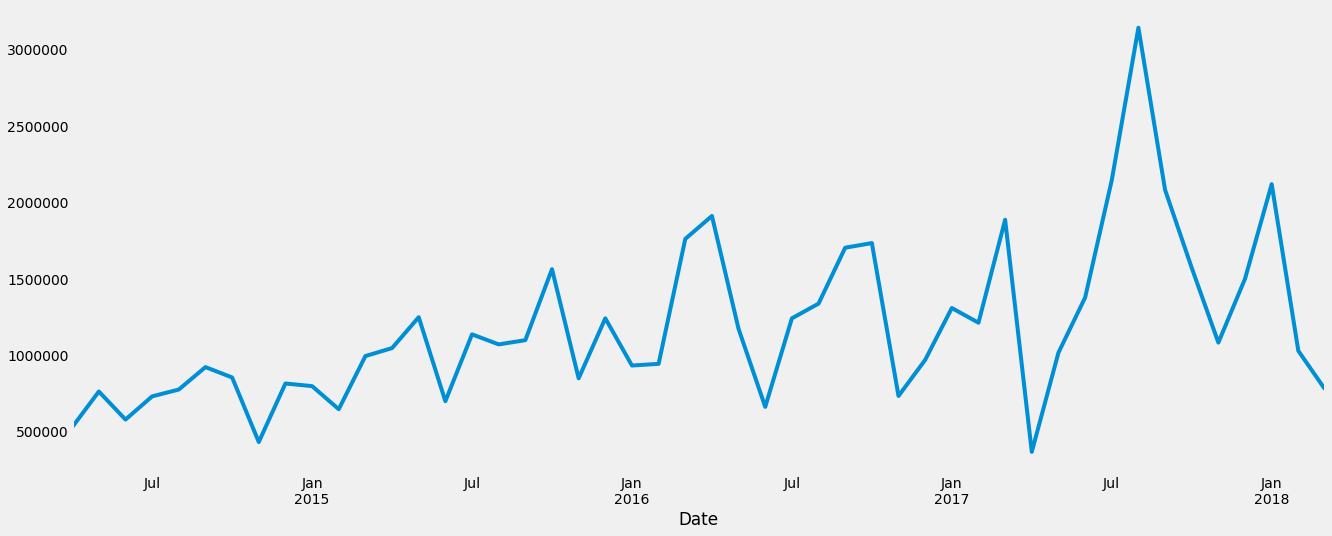

In [18]:
GS_Mum['sales'].plot()
plt.grid();

In [19]:
GS_Mum.sort_index(inplace= True)

In [20]:
GS_Mum.head()

,product,city,sales
Date,,,
2014-04-01,Gas Stove,Mumbai,526894
2014-05-01,Gas Stove,Mumbai,759977
2014-06-01,Gas Stove,Mumbai,576708
2014-07-01,Gas Stove,Mumbai,728336
2014-08-01,Gas Stove,Mumbai,773037


In [21]:
from    statsmodels.tsa.seasonal import   seasonal_decompose

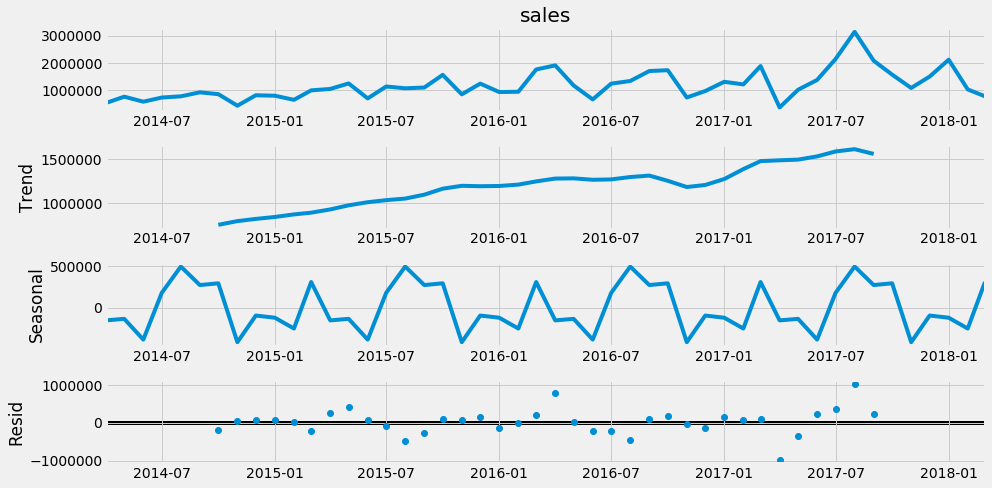

In [22]:
from pylab import rcParams
rcParams['figure.figsize'] = 14, 7
decomposition = seasonal_decompose(GS_Mum['sales'],model='additive')
decomposition.plot();

In [23]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Date
2014-04-01              NaN
2014-05-01              NaN
2014-06-01              NaN
2014-07-01              NaN
2014-08-01              NaN
2014-09-01              NaN
2014-10-01    755731.500000
2014-11-01    797529.791667
2014-12-01    822772.583333
2015-01-01    844669.750000
2015-02-01    873867.208333
2015-03-01    893500.000000
Name: trend, dtype: float64 

Seasonality 
 Date
2014-04-01   -153323.163194
2014-05-01   -135059.899306
2014-06-01   -386598.510417
2014-07-01    180166.892361
2014-08-01    499085.003472
2014-09-01    274598.142361
2014-10-01    295901.572917
2014-11-01   -417438.135417
2014-12-01    -94935.065972
2015-01-01   -121209.468750
2015-02-01   -252384.788194
2015-03-01    311197.420139
Name: seasonal, dtype: float64 

Residual 
 Date
2014-04-01              NaN
2014-05-01              NaN
2014-06-01              NaN
2014-07-01              NaN
2014-08-01              NaN
2014-09-01              NaN
2014-10-01   -199811.072917
2014-11-01     49535.

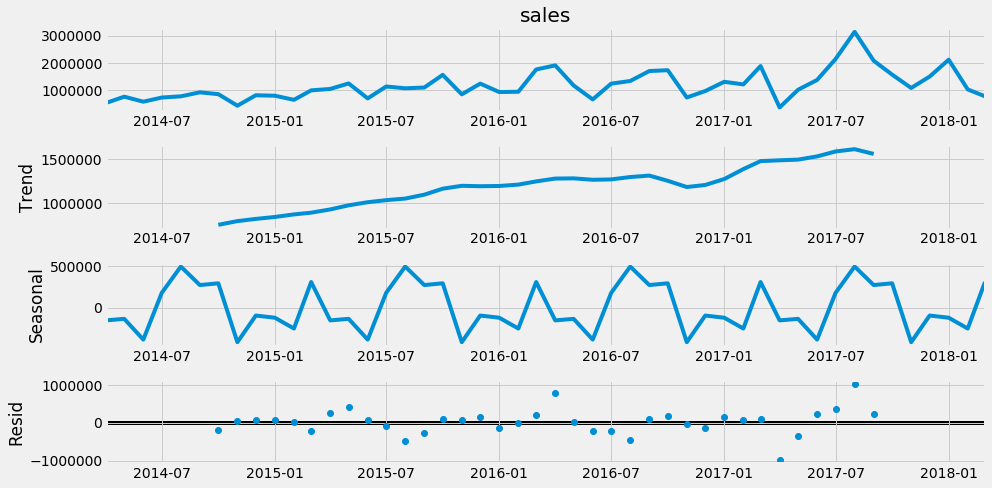

In [24]:
from pylab import rcParams
rcParams['figure.figsize'] = 14, 7
decomposition = seasonal_decompose(GS_Mum['sales'],model='Multiplicative')
decomposition.plot();

In [25]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Date
2014-04-01              NaN
2014-05-01              NaN
2014-06-01              NaN
2014-07-01              NaN
2014-08-01              NaN
2014-09-01              NaN
2014-10-01    755731.500000
2014-11-01    797529.791667
2014-12-01    822772.583333
2015-01-01    844669.750000
2015-02-01    873867.208333
2015-03-01    893500.000000
Name: trend, dtype: float64 

Seasonality 
 Date
2014-04-01   -153323.163194
2014-05-01   -135059.899306
2014-06-01   -386598.510417
2014-07-01    180166.892361
2014-08-01    499085.003472
2014-09-01    274598.142361
2014-10-01    295901.572917
2014-11-01   -417438.135417
2014-12-01    -94935.065972
2015-01-01   -121209.468750
2015-02-01   -252384.788194
2015-03-01    311197.420139
Name: seasonal, dtype: float64 

Residual 
 Date
2014-04-01              NaN
2014-05-01              NaN
2014-06-01              NaN
2014-07-01              NaN
2014-08-01              NaN
2014-09-01              NaN
2014-10-01   -199811.072917
2014-11-01     49535.

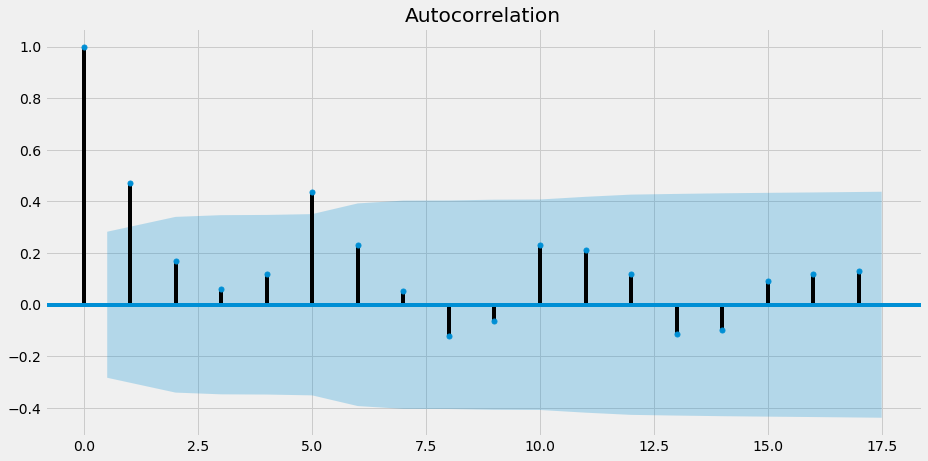

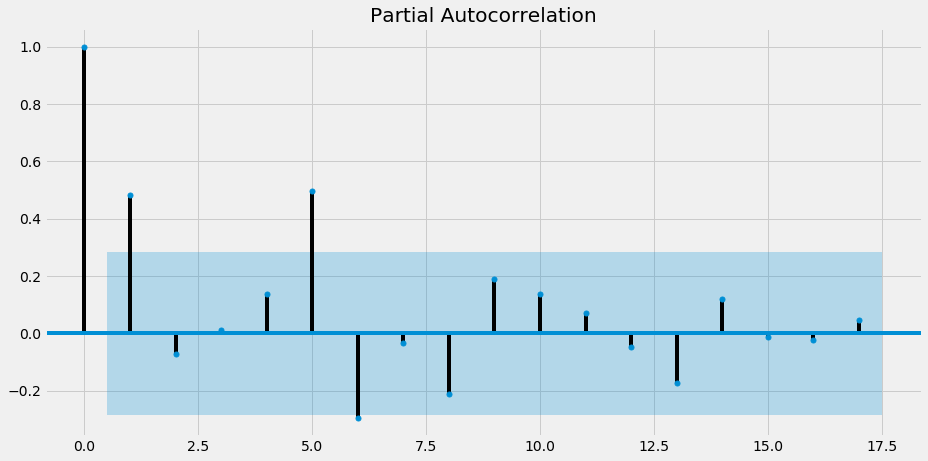

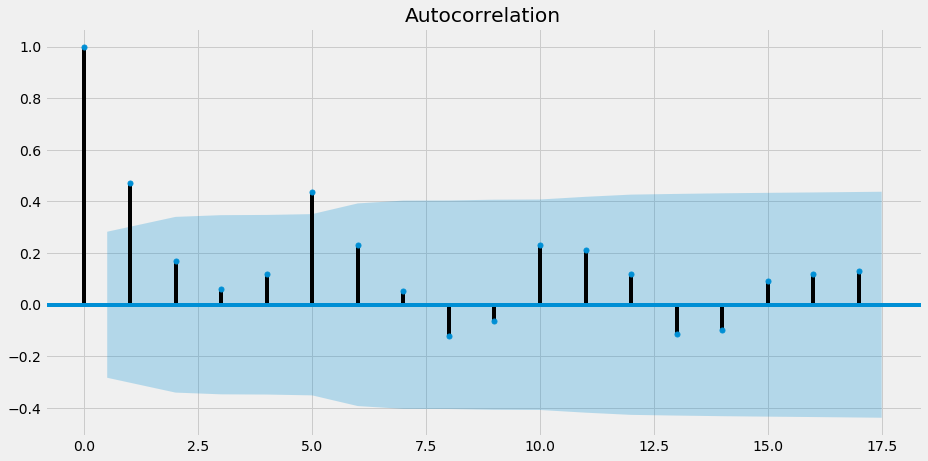

In [26]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_pacf(GS_Mum['sales'])
plot_acf(GS_Mum['sales'])

In [29]:
GS_Mum.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48 entries, 2014-04-01 to 2018-03-01
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   product  48 non-null     object
 1   city     48 non-null     object
 2   sales    48 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.5+ KB


In [30]:
train    =   GS_Mum[0:int(len(GS_Mum)*0.7)] 
test     =  GS_Mum[int(len(GS_Mum)*0.7):]

In [31]:
train.shape

(33, 3)

In [32]:
test.shape

(15, 3)

In [33]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


,product,city,sales
Date,,,
2014-04-01,Gas Stove,Mumbai,526894
2014-05-01,Gas Stove,Mumbai,759977
2014-06-01,Gas Stove,Mumbai,576708
2014-07-01,Gas Stove,Mumbai,728336
2014-08-01,Gas Stove,Mumbai,773037


Last few rows of Training Data


,product,city,sales
Date,,,
2016-08-01,Gas Stove,Mumbai,1334810
2016-09-01,Gas Stove,Mumbai,1700509
2016-10-01,Gas Stove,Mumbai,1730803
2016-11-01,Gas Stove,Mumbai,730862
2016-12-01,Gas Stove,Mumbai,966831


First few rows of Test Data


,product,city,sales
Date,,,
2017-01-01,Gas Stove,Mumbai,1306082
2017-02-01,Gas Stove,Mumbai,1209905
2017-03-01,Gas Stove,Mumbai,1883281
2017-04-01,Gas Stove,Mumbai,365169
2017-05-01,Gas Stove,Mumbai,1013985


Last few rows of Test Data


,product,city,sales
Date,,,
2017-11-01,Gas Stove,Mumbai,1079786
2017-12-01,Gas Stove,Mumbai,1497683
2018-01-01,Gas Stove,Mumbai,2116298
2018-02-01,Gas Stove,Mumbai,1025850
2018-03-01,Gas Stove,Mumbai,774517


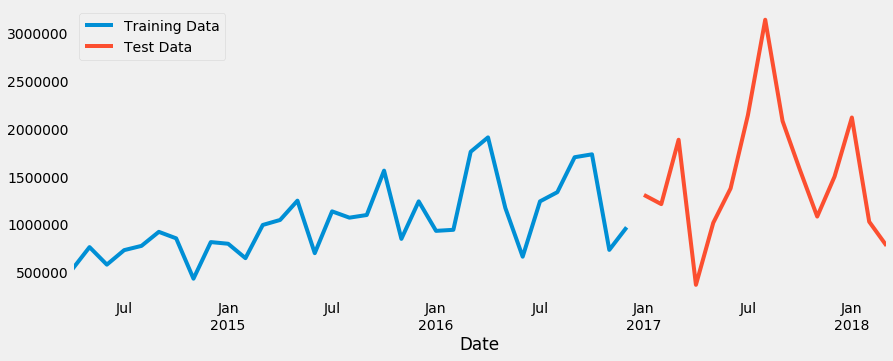

In [34]:
train['sales'].plot(figsize=(13,5), fontsize=14)
test['sales'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

In [35]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147]


In [36]:
from sklearn import metrics

Simpleaverage

In [37]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [38]:
SimpleAverage_test['mean_forecast'] = train['sales'].mean()
SimpleAverage_test.head()

,product,city,sales,mean_forecast
Date,,,,
2017-01-01,Gas Stove,Mumbai,1306082,1.024502e+06
2017-02-01,Gas Stove,Mumbai,1209905,1.024502e+06
2017-03-01,Gas Stove,Mumbai,1883281,1.024502e+06
2017-04-01,Gas Stove,Mumbai,365169,1.024502e+06
2017-05-01,Gas Stove,Mumbai,1013985,1.024502e+06


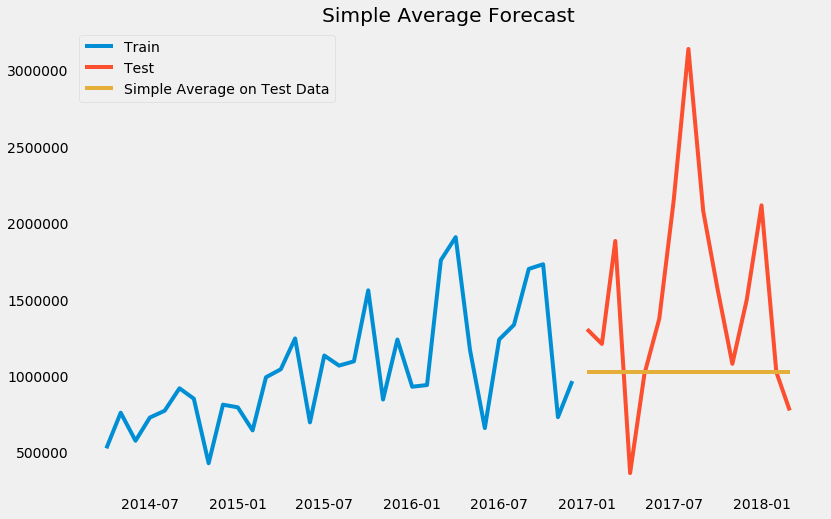

In [39]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['sales'], label='Train')
plt.plot(SimpleAverage_test['sales'], label='Test')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [40]:
## Test Data - RMSE 

rmse_model3_test = metrics.mean_squared_error(test['sales'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 817182.862


In [41]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model3_test]},index=['Simple Average'])
resultsDf

,Test RMSE
Simple Average,817182.861613


In [42]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

Simple average

In [43]:
SES_train = train.copy()
SES_test = test.copy()

In [44]:
model_SES = SimpleExpSmoothing(SES_train['sales'])

c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [45]:
model_SES_autofit = model_SES.fit(optimized=True)

c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\holtwinters\model.py:922: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


In [46]:
model_SES_autofit.params

{'smoothing_level': 0.2650779038131796,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 558863.5979639975,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [47]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test))
SES_test.head()

,product,city,sales,predict
Date,,,,
2017-01-01,Gas Stove,Mumbai,1306082,1.182210e+06
2017-02-01,Gas Stove,Mumbai,1209905,1.182210e+06
2017-03-01,Gas Stove,Mumbai,1883281,1.182210e+06
2017-04-01,Gas Stove,Mumbai,365169,1.182210e+06
2017-05-01,Gas Stove,Mumbai,1013985,1.182210e+06


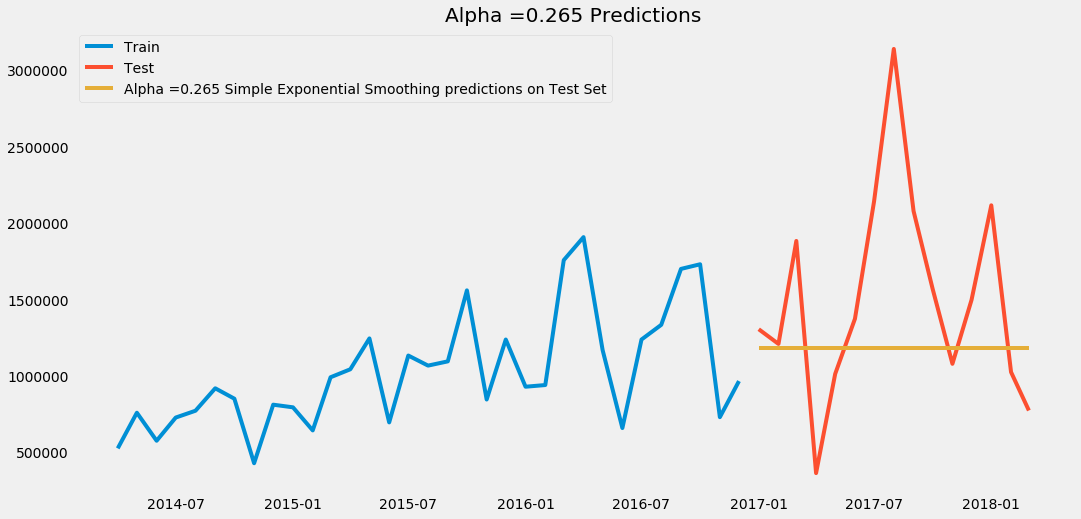

In [48]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(SES_train['sales'], label='Train')
plt.plot(SES_test['sales'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.265 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.265 Predictions');

In [49]:
## Test Data

rmse_model5_test_1 = metrics.mean_squared_error(SES_test['sales'],SES_test['predict'],squared=False)
print("For Alpha =0.265 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model5_test_1))


For Alpha =0.265 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 735596.597


In [50]:
def mean_absolute_percentage_error(y_true, y_pred): 

    y_true, y_pred = np.array(y_true), np.array(y_pred)

    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [51]:
mape = mean_absolute_percentage_error(SES_test['sales'],SES_test['predict'])
print('\nMAPE:',mape)


MAPE: 41.385302571281805


In [52]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_model5_test_1], 'Test MAPE': [mape] },index=['Alpha=0.265,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

,Test RMSE,Test MAPE
Simple Average,817182.861613,NaN
"Alpha=0.265,SimpleExponentialSmoothing",735596.596964,41.385303


In [53]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_6 = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_6

,Alpha Values,Train RMSE,Test RMSE


In [54]:
for i in np.arange(0.1,1,0.1):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_train['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test['predict',i] = model_SES_alpha_i.forecast(steps=18)
    
    rmse_model5_train_i = metrics.mean_squared_error(SES_train['sales'],SES_train['predict',i],squared=False)
    
    rmse_model5_test_i = metrics.mean_squared_error(SES_test['sales'],SES_test['predict',i],squared=False)
    
    resultsDf_6 = resultsDf_6.append({'Alpha Values':i,'Train RMSE':rmse_model5_train_i 
                                      ,'Test RMSE':rmse_model5_test_i}, ignore_index=True)

In [55]:
resultsDf_6.sort_values(by=['Test RMSE'],ascending=True)

,Alpha Values,Train RMSE,Test RMSE
1,0.2,338598.773926,727156.527688
2,0.3,339501.501275,742331.807496
0,0.1,367178.710034,745803.287714
3,0.4,346171.084957,766220.354543
4,0.5,353948.465679,793512.386684
5,0.6,361653.661447,820445.285551
6,0.7,369183.254971,843029.713335
7,0.8,376903.672415,857497.261038
8,0.9,385381.185300,861064.336323


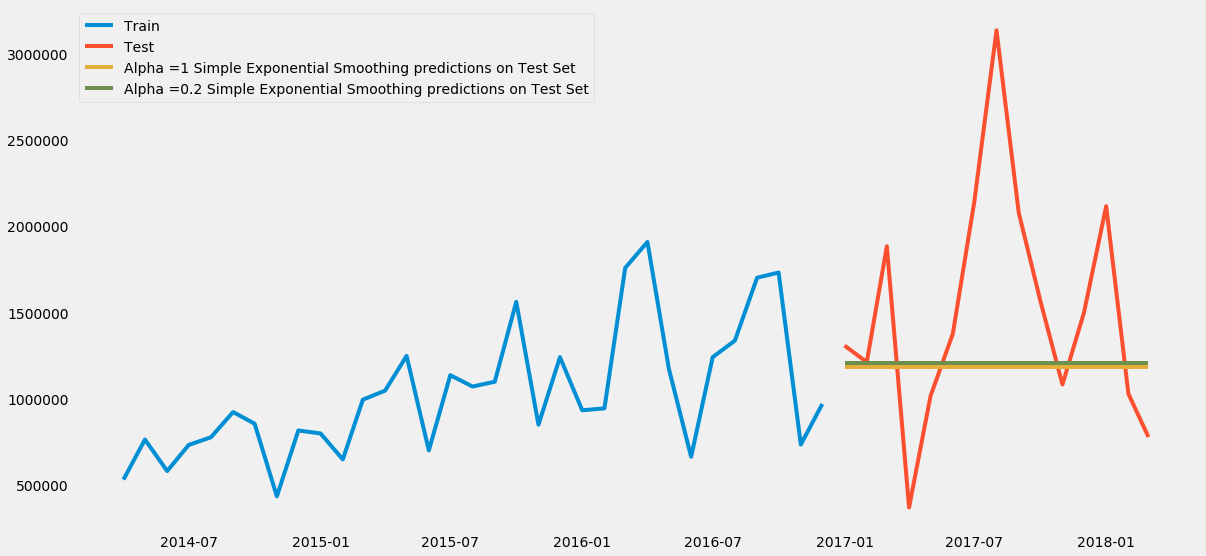

In [57]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(SES_train['sales'], label='Train')
plt.plot(SES_test['sales'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =1 Simple Exponential Smoothing predictions on Test Set')

plt.plot(SES_test['predict', 0.2], label='Alpha =0.2 Simple Exponential Smoothing predictions on Test Set')



plt.legend(loc='best')
plt.grid();

In [58]:
mape = mean_absolute_percentage_error(SES_test['sales'],SES_test['predict',0.2
                                                                ])
print('\nMAPE:',mape)


MAPE: 41.519655444872036


In [59]:
resultsDf_6_1 = pd.DataFrame({'Test RMSE': [resultsDf_6.sort_values(by=['Test RMSE'],ascending=True).values[0][2]],'Test MAPE':[mape]}
                           ,index=['Alpha=0.1,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_6_1])
resultsDf

,Test RMSE,Test MAPE
Simple Average,817182.861613,NaN
"Alpha=0.265,SimpleExponentialSmoothing",735596.596964,41.385303
"Alpha=0.1,SimpleExponentialSmoothing",727156.527688,41.519655


Double

In [60]:
DES_train = train.copy()
DES_test = test.copy()

In [61]:
model_DES = Holt(DES_train['sales'])

c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [62]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_7 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_7

,Alpha Values,Beta Values,Train RMSE,Test RMSE


In [63]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i, smoothing_trend = j, optimized=False,use_brute=True)
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=18)
        
        rmse_model6_train = metrics.mean_squared_error(DES_train['sales'],DES_train['predict',i,j],squared=False)
        
        rmse_model6_test = metrics.mean_squared_error(DES_test['sales'],DES_test['predict',i,j],squared=False)
        
        resultsDf_7 = resultsDf_7.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model6_train
                                          ,'Test RMSE':rmse_model6_test}, ignore_index=True)

In [64]:
resultsDf_7

,Alpha Values,Beta Values,Train RMSE,Test RMSE
0,0.1,0.1,852751.369880,6.720412e+05
1,0.1,0.2,622332.050829,8.076363e+05
2,0.1,0.3,547829.787376,6.703794e+05
3,0.1,0.4,512392.583109,6.689159e+05
4,0.1,0.5,493171.742148,6.644852e+05
...,...,...,...,...
95,1.0,0.6,523126.831796,1.385747e+06
96,1.0,0.7,546952.567572,1.064414e+06
97,1.0,0.8,572355.518390,7.270042e+05
98,1.0,0.9,599852.185851,9.461093e+05


In [65]:
resultsDf_7.sort_values(by=['Test RMSE']).head()

,Alpha Values,Beta Values,Train RMSE,Test RMSE
4,0.1,0.5,493171.742148,664485.176327
3,0.1,0.4,512392.583109,668915.877601
2,0.1,0.3,547829.787376,670379.444081
0,0.1,0.1,852751.369880,672041.214223
10,0.2,0.1,516632.458786,685497.293548


In [66]:
mape = mean_absolute_percentage_error(DES_test['sales'],DES_test['predict',0.1,0.5])
print('\nMAPE:',mape)


MAPE: 48.641980586420985


In [67]:
resultsDf_7_1 = pd.DataFrame({'Test RMSE': [resultsDf_7.sort_values(by=['Test RMSE']).values[0][3]],'Test MAPE':[mape]}
                           ,index=['Alpha=0.1,Beta=0.6,DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_7_1])
resultsDf

,Test RMSE,Test MAPE
Simple Average,817182.861613,NaN
"Alpha=0.265,SimpleExponentialSmoothing",735596.596964,41.385303
"Alpha=0.1,SimpleExponentialSmoothing",727156.527688,41.519655
"Alpha=0.1,Beta=0.6,DoubleExponentialSmoothing",664485.176327,48.641981


In [68]:
TES_train = train.copy()
TES_test = test.copy()

In [69]:
# Initializing the Double Exponential Smoothing Model
model_TES = ExponentialSmoothing(train['sales'],trend='additive',seasonal='Multiplicative',initialization_method='estimated')

c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [70]:
model_TES_autofit = model_TES.fit()

c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\holtwinters\model.py:922: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


In [71]:
model_TES_autofit.params

{'smoothing_level': 0.07571428571428572,
 'smoothing_trend': 0.07571428571428572,
 'smoothing_seasonal': 0.03423280423280423,
 'damping_trend': nan,
 'initial_level': 725282.8666666666,
 'initial_trend': 30743.99621212126,
 'initial_seasons': array([1.157526  , 1.31503324, 0.70970376, 1.12929871, 1.04553987,
        1.02943653, 1.16257923, 0.55563025, 1.01859834, 0.97107929,
        0.76059124, 1.14498353]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [72]:
## Prediction on the test data

TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(test))
TES_test.head()

,product,city,sales,auto_predict
Date,,,,
2017-01-01,Gas Stove,Mumbai,1306082,1.375627e+06
2017-02-01,Gas Stove,Mumbai,1209905,1.101748e+06
2017-03-01,Gas Stove,Mumbai,1883281,1.694488e+06
2017-04-01,Gas Stove,Mumbai,365169,1.718381e+06
2017-05-01,Gas Stove,Mumbai,1013985,1.948785e+06


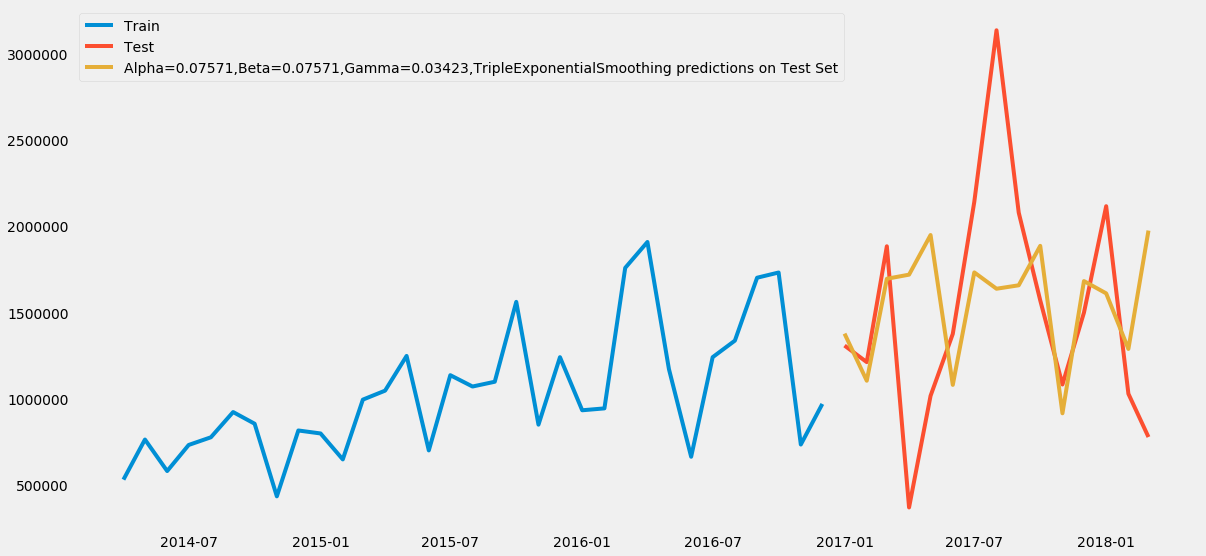

In [73]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(TES_train['sales'], label='Train')
plt.plot(TES_test['sales'], label='Test')

plt.plot(TES_test['auto_predict'], label='Alpha=0.07571,Beta=0.07571,Gamma=0.03423,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [74]:
## Test Data

rmse_model6_test_1 = metrics.mean_squared_error(TES_test['sales'],TES_test['auto_predict'],squared=False)
print("Forlabel='Alpha=0.07571,Beta=0.07571,Gamma=0.03423', Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model6_test_1))

Forlabel='Alpha=0.07571,Beta=0.07571,Gamma=0.03423', Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 701236.944


In [75]:
mape = mean_absolute_percentage_error(TES_test['sales'],TES_test['auto_predict'])
print('\nMAPE:',mape)


MAPE: 56.5458183101041


In [76]:
resultsDf_8_1 = pd.DataFrame({'Test RMSE': [rmse_model6_test_1], 'Test MAPE' : [mape]}
                           ,index=['Alpha=0.07571,Beta=0.07571,Gamma=0.03423,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_1])
resultsDf

,Test RMSE,Test MAPE
Simple Average,817182.861613,NaN
"Alpha=0.265,SimpleExponentialSmoothing",735596.596964,41.385303
"Alpha=0.1,SimpleExponentialSmoothing",727156.527688,41.519655
"Alpha=0.1,Beta=0.6,DoubleExponentialSmoothing",664485.176327,48.641981
"Alpha=0.07571,Beta=0.07571,Gamma=0.03423,TripleExponentialSmoothing",701236.943568,56.545818


In [77]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_8_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_8_2

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE


In [78]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        for k in np.arange(0.1,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=18)
        
            rmse_model8_train = metrics.mean_squared_error(TES_train['sales'],TES_train['predict',i,j,k],squared=False)
            
            rmse_model8_test = metrics.mean_squared_error(TES_test['sales'],TES_test['predict',i,j,k],squared=False)
            
            resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_model8_train,'Test RMSE':rmse_model8_test}
                                                 , ignore_index=True)

In [79]:
resultsDf_8_2

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE
0,0.1,0.1,0.1,2.260496e+05,6.969138e+05
1,0.1,0.1,0.2,2.276705e+05,7.014984e+05
2,0.1,0.1,0.3,2.299383e+05,7.105757e+05
3,0.1,0.1,0.4,2.325878e+05,7.229460e+05
4,0.1,0.1,0.5,2.354384e+05,7.375422e+05
...,...,...,...,...,...
995,1.0,1.0,0.6,1.218668e+06,7.789208e+06
996,1.0,1.0,0.7,2.373078e+06,1.115738e+07
997,1.0,1.0,0.8,1.128566e+07,2.022151e+07
998,1.0,1.0,0.9,3.815236e+06,1.805108e+07


In [80]:
resultsDf_8_2.sort_values(by=['Test RMSE']).head()

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE
647,0.7,0.5,0.8,393197.495670,605993.510562
737,0.8,0.4,0.8,398508.177772,615099.691235
828,0.9,0.3,0.9,431331.991427,615455.461660
728,0.8,0.3,0.9,386555.358248,619319.668833
819,0.9,0.2,1.0,429089.455730,624315.877359


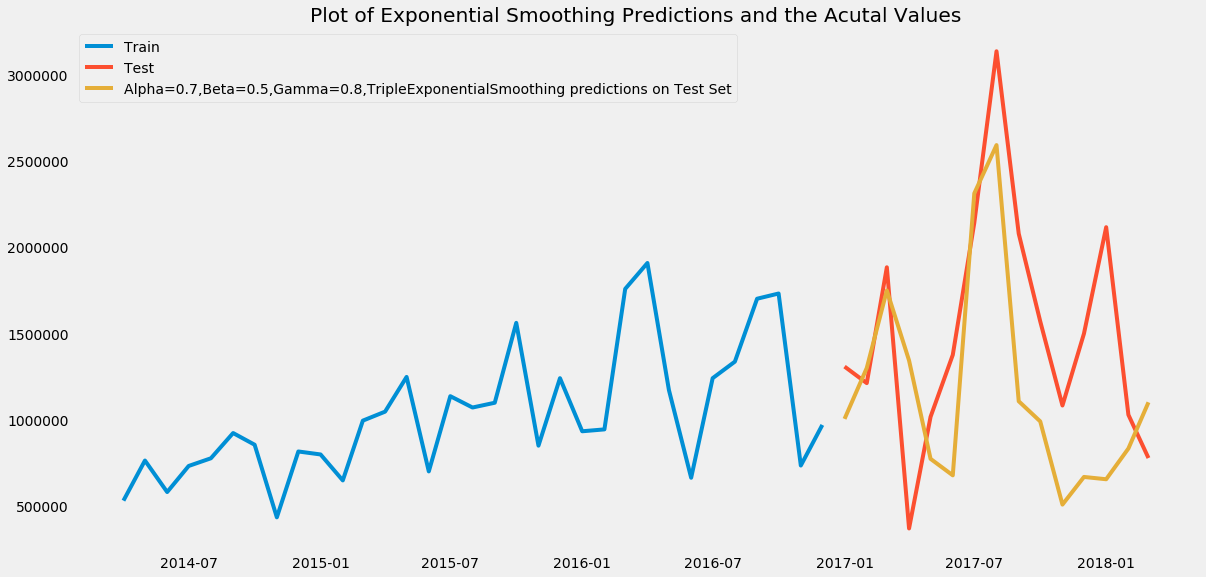

In [82]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(train['sales'], label='Train')
plt.plot(test['sales'], label='Test')


plt.plot(TES_test['predict', 0.8000000000000000, 0.5000000000000000, 0.8], label='Alpha=0.7,Beta=0.5,Gamma=0.8,TripleExponentialSmoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid();
plt.title('Plot of Exponential Smoothing Predictions and the Acutal Values');

In [83]:
mape = mean_absolute_percentage_error(TES_test['sales'],TES_test['predict',0.8,0.5,0.8])
print('\nMAPE:',mape)


MAPE: 48.5678470183707


In [84]:
resultsDf_8_3 = pd.DataFrame({'Test RMSE': [resultsDf_8_2.sort_values(by=['Test RMSE']).values[0][4]],'Test MAPE':[mape]}
                           ,index=['Alpha=0.7,Beta=0.5,Gamma=0.8,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_3])
resultsDf

,Test RMSE,Test MAPE
Simple Average,817182.861613,NaN
"Alpha=0.265,SimpleExponentialSmoothing",735596.596964,41.385303
"Alpha=0.1,SimpleExponentialSmoothing",727156.527688,41.519655
"Alpha=0.1,Beta=0.6,DoubleExponentialSmoothing",664485.176327,48.641981
"Alpha=0.07571,Beta=0.07571,Gamma=0.03423,TripleExponentialSmoothing",701236.943568,56.545818
"Alpha=0.7,Beta=0.5,Gamma=0.8,TripleExponentialSmoothing",605993.510562,48.567847


In [85]:
print('Sorted by RMSE values on the Test Data:','\n',)
resultsDf.sort_values(by=['Test RMSE'])

Sorted by RMSE values on the Test Data: 



,Test RMSE,Test MAPE
"Alpha=0.7,Beta=0.5,Gamma=0.8,TripleExponentialSmoothing",605993.510562,48.567847
"Alpha=0.1,Beta=0.6,DoubleExponentialSmoothing",664485.176327,48.641981
"Alpha=0.07571,Beta=0.07571,Gamma=0.03423,TripleExponentialSmoothing",701236.943568,56.545818
"Alpha=0.1,SimpleExponentialSmoothing",727156.527688,41.519655
"Alpha=0.265,SimpleExponentialSmoothing",735596.596964,41.385303
Simple Average,817182.861613,NaN


In [86]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

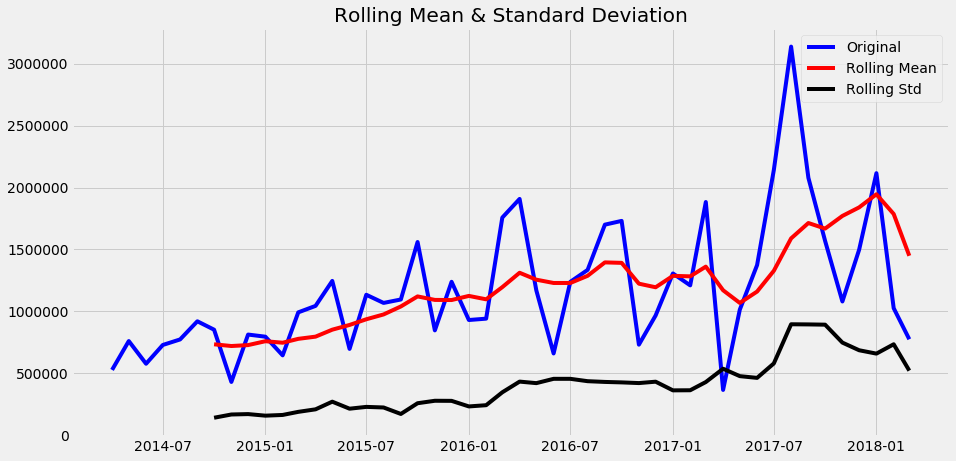

Results of Dickey-Fuller Test:
Test Statistic                 -0.893537
p-value                         0.790093
#Lags Used                      9.000000
Number of Observations Used    38.000000
Critical Value (1%)            -3.615509
Critical Value (5%)            -2.941262
Critical Value (10%)           -2.609200
dtype: float64 



In [87]:
test_stationarity(GS_Mum['sales'])

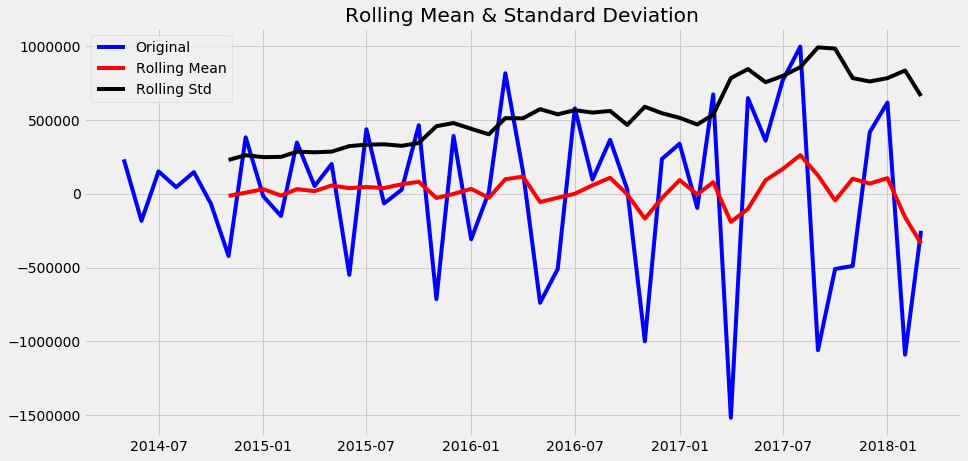

Results of Dickey-Fuller Test:
Test Statistic                 -4.045886
p-value                         0.001188
#Lags Used                      9.000000
Number of Observations Used    37.000000
Critical Value (1%)            -3.620918
Critical Value (5%)            -2.943539
Critical Value (10%)           -2.610400
dtype: float64 



In [88]:
test_stationarity(GS_Mum['sales'].diff().dropna())

In [242]:
train =train[~train.isin([np.nan, np.inf, -np.inf]).any(1)]

In [243]:
test.dropna(inplace=True)

In [244]:
test = test.replace(np.inf, np.nan).replace(-np.inf, np.nan).dropna()

In [125]:
from statsmodels.tsa.stattools import adfuller

In [96]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 4)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Examples of the parameter combinations for the Model')
for i in range(0,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Examples of the parameter combinations for the Model
Model: (0, 1, 0)
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [97]:

# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [98]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:# running a loop within the pdq parameters defined by itertools
    ARIMA_model = ARIMA(train['sales'].values,order=param).fit()#fitting the ARIMA model
    #using the parameters from the loop
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))#printing the parameters and the AIC
    #from the fitted models
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
    #appending the AIC values and the model parameters to the previously created data frame
    #for easier understanding and sorting of the AIC values

ARIMA(0, 1, 0) - AIC:918.5918991164436
ARIMA(0, 1, 1) - AIC:913.3809699183164
ARIMA(0, 1, 2) - AIC:912.8478426919082
ARIMA(0, 1, 3) - AIC:909.2472559056913
ARIMA(1, 1, 0) - AIC:918.6504132043675
ARIMA(1, 1, 1) - AIC:914.1004831801558
ARIMA(1, 1, 2) - AIC:910.1199111601753
ARIMA(1, 1, 3) - AIC:910.820943172286
ARIMA(2, 1, 0) - AIC:916.8664519891236
ARIMA(2, 1, 1) - AIC:913.5638296528562
ARIMA(2, 1, 2) - AIC:911.8734387835564
ARIMA(2, 1, 3) - AIC:912.3250058223084
ARIMA(3, 1, 0) - AIC:917.0087915177138
ARIMA(3, 1, 1) - AIC:914.7245374148879
ARIMA(3, 1, 2) - AIC:913.5089814260068
ARIMA(3, 1, 3) - AIC:910.2205296317861


In [99]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True).head()

,param,AIC
3,"(0, 1, 3)",909.247256
6,"(1, 1, 2)",910.119911
15,"(3, 1, 3)",910.220530
7,"(1, 1, 3)",910.820943
10,"(2, 1, 2)",911.873439


In [100]:
auto_ARIMA = ARIMA(train['sales'], order=(0,1,3))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                  sales   No. Observations:                   33
Model:                 ARIMA(0, 1, 3)   Log Likelihood                -450.624
Date:                Sat, 21 Aug 2021   AIC                            909.247
Time:                        15:10:50   BIC                            915.110
Sample:                    04-01-2014   HQIC                           911.191
                         - 12-01-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7652      0.584     -1.309      0.190      -1.911       0.380
ma.L2         -0.7564      0.709     -1.067      0.286      -2.145       0.633
ma.L3          0.8139      0.443      1.836      0.0

c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


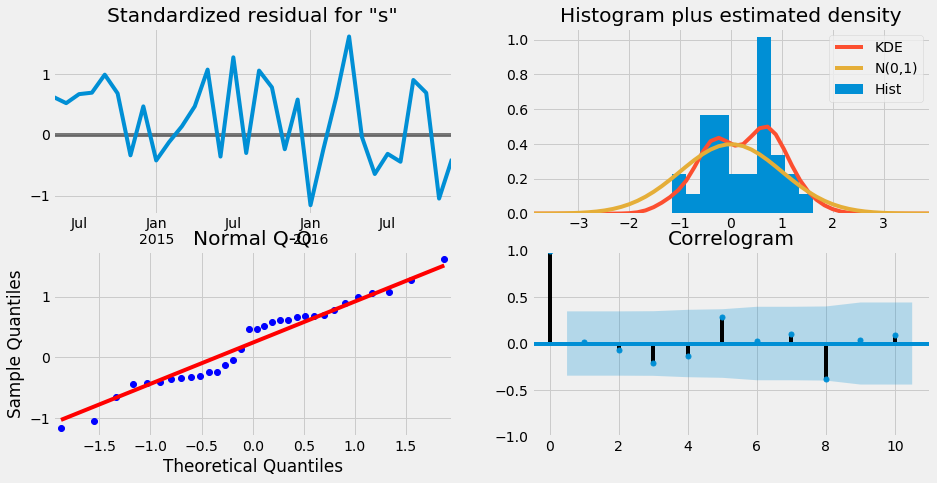

In [101]:
results_auto_ARIMA.plot_diagnostics();

In [102]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [103]:
## Mean Absolute Percentage Error (MAPE) - Function Definition

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

## Importing the mean_squared_error function from sklearn to calculate the RMSE

from sklearn.metrics import mean_squared_error

In [104]:
rmse = mean_squared_error(test['sales'],predicted_auto_ARIMA,squared=False)
mape = mean_absolute_percentage_error(test['sales'],predicted_auto_ARIMA)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 708546.5440100377 
MAPE: 44.52081163395266


In [106]:
resultsDf_8_4 = pd.DataFrame({'Test RMSE': [resultsDf_8_3.sort_values(by=['Test RMSE']).values[0][1]],'Test MAPE':[mape]}
                           ,index=['ARIMA(0,1,3)'])

resultsDf = pd.concat([resultsDf, resultsDf_8_4])
resultsDf

,Test RMSE,Test MAPE
Simple Average,817182.861613,NaN
"Alpha=0.265,SimpleExponentialSmoothing",735596.596964,41.385303
"Alpha=0.1,SimpleExponentialSmoothing",727156.527688,41.519655
"Alpha=0.1,Beta=0.6,DoubleExponentialSmoothing",664485.176327,48.641981
"Alpha=0.07571,Beta=0.07571,Gamma=0.03423,TripleExponentialSmoothing",701236.943568,56.545818
"Alpha=0.7,Beta=0.5,Gamma=0.8,TripleExponentialSmoothing",605993.510562,48.567847
"ARIMA(3,0,2)",48.567847,44.520812
"ARIMA(0,1,3)",48.567847,44.520812


In [108]:
import itertools
p = q = range(0, 4)
d= range(1,2)
D = range(1,2)
pdq = list(itertools.product(p, d, q))
PDQ = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of the parameter combinations for the Model are')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], PDQ[i]))

Examples of the parameter combinations for the Model are
Model: (0, 1, 1)(0, 1, 1, 12)
Model: (0, 1, 2)(0, 1, 2, 12)
Model: (0, 1, 3)(0, 1, 3, 12)
Model: (1, 1, 0)(1, 1, 0, 12)
Model: (1, 1, 1)(1, 1, 1, 12)
Model: (1, 1, 2)(1, 1, 2, 12)
Model: (1, 1, 3)(1, 1, 3, 12)
Model: (2, 1, 0)(2, 1, 0, 12)
Model: (2, 1, 1)(2, 1, 1, 12)
Model: (2, 1, 2)(2, 1, 2, 12)
Model: (2, 1, 3)(2, 1, 3, 12)
Model: (3, 1, 0)(3, 1, 0, 12)
Model: (3, 1, 1)(3, 1, 1, 12)
Model: (3, 1, 2)(3, 1, 2, 12)
Model: (3, 1, 3)(3, 1, 3, 12)


In [109]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [110]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in PDQ:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['sales'],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit()
        print('SARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
        

c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base

SARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:544.241471584877
SARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:198.62422337171847
SARIMA(0, 1, 0)x(0, 1, 2, 12)12 - AIC:6.0
SARIMA(0, 1, 0)x(0, 1, 3, 12)12 - AIC:8.0
SARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:233.23914592579146


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:199.23356953779412
SARIMA(0, 1, 0)x(1, 1, 2, 12)12 - AIC:8.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 0)x(1, 1, 3, 12)12 - AIC:10.0
SARIMA(0, 1, 0)x(2, 1, 0, 12)12 - AIC:6.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 0)x(2, 1, 1, 12)12 - AIC:8.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 0)x(2, 1, 2, 12)12 - AIC:10.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 0)x(2, 1, 3, 12)12 - AIC:12.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 0)x(3, 1, 0, 12)12 - AIC:8.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 0)x(3, 1, 1, 12)12 - AIC:10.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 0)x(3, 1, 2, 12)12 - AIC:12.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 0)x(3, 1, 3, 12)12 - AIC:14.0
SARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:511.35634539743097


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:172.2218780917575
SARIMA(0, 1, 1)x(0, 1, 2, 12)12 - AIC:8.0

c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)



SARIMA(0, 1, 1)x(0, 1, 3, 12)12 - AIC:10.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:234.0787555353103


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:173.10343674035815


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 1)x(1, 1, 2, 12)12 - AIC:10.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 1)x(1, 1, 3, 12)12 - AIC:12.0
SARIMA(0, 1, 1)x(2, 1, 0, 12)12 - AIC:8.0

c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)



SARIMA(0, 1, 1)x(2, 1, 1, 12)12 - AIC:10.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 1)x(2, 1, 2, 12)12 - AIC:12.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 1)x(2, 1, 3, 12)12 - AIC:14.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 1)x(3, 1, 0, 12)12 - AIC:10.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 1)x(3, 1, 1, 12)12 - AIC:12.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 1)x(3, 1, 2, 12)12 - AIC:14.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 1)x(3, 1, 3, 12)12 - AIC:16.0
SARIMA(0, 1, 2)x(0, 1, 0, 12)12 - AIC:481.93887146725615


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 2)x(0, 1, 1, 12)12 - AIC:145.9314612179975


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 2)x(0, 1, 2, 12)12 - AIC:10.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 2)x(0, 1, 3, 12)12 - AIC:12.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 2)x(1, 1, 0, 12)12 - AIC:229.37991913678746


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 2)x(1, 1, 1, 12)12 - AIC:147.622709272936
SARIMA(0, 1, 2)x(1, 1, 2, 12)12 - AIC:12.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 2)x(1, 1, 3, 12)12 - AIC:14.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 2)x(2, 1, 0, 12)12 - AIC:10.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 2)x(2, 1, 1, 12)12 - AIC:12.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 2)x(2, 1, 2, 12)12 - AIC:14.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 2)x(2, 1, 3, 12)12 - AIC:16.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 2)x(3, 1, 0, 12)12 - AIC:12.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 2)x(3, 1, 1, 12)12 - AIC:14.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 2)x(3, 1, 2, 12)12 - AIC:16.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 2)x(3, 1, 3, 12)12 - AIC:18.0
SARIMA(0, 1, 3)x(0, 1, 0, 12)12 - AIC:455.37785388312693


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 3)x(0, 1, 1, 12)12 - AIC:120.38084425074408


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 3)x(0, 1, 2, 12)12 - AIC:12.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 3)x(0, 1, 3, 12)12 - AIC:14.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 3)x(1, 1, 0, 12)12 - AIC:231.41001690455164


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.p

SARIMA(0, 1, 3)x(1, 1, 1, 12)12 - AIC:122.37069988214652
SARIMA(0, 1, 3)x(1, 1, 2, 12)12 - AIC:14.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 3)x(1, 1, 3, 12)12 - AIC:16.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 3)x(2, 1, 0, 12)12 - AIC:12.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 3)x(2, 1, 1, 12)12 - AIC:14.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 3)x(2, 1, 2, 12)12 - AIC:16.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 3)x(2, 1, 3, 12)12 - AIC:18.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 3)x(3, 1, 0, 12)12 - AIC:14.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 3)x(3, 1, 1, 12)12 - AIC:16.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 3)x(3, 1, 2, 12)12 - AIC:18.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 3)x(3, 1, 3, 12)12 - AIC:20.0
SARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:542.4372856469902
SARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:200.7588140244161


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base

SARIMA(1, 1, 0)x(0, 1, 2, 12)12 - AIC:8.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 0)x(0, 1, 3, 12)12 - AIC:10.0
SARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:200.48225233153528


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:201.55943721386035


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 0)x(1, 1, 2, 12)12 - AIC:10.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 0)x(1, 1, 3, 12)12 - AIC:12.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 0)x(2, 1, 0, 12)12 - AIC:8.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 0)x(2, 1, 1, 12)12 - AIC:10.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 0)x(2, 1, 2, 12)12 - AIC:12.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 0)x(2, 1, 3, 12)12 - AIC:14.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 0)x(3, 1, 0, 12)12 - AIC:10.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 0)x(3, 1, 1, 12)12 - AIC:12.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 0)x(3, 1, 2, 12)12 - AIC:14.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 0)x(3, 1, 3, 12)12 - AIC:16.0
SARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:511.6353629551767


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:174.22842521818163


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 1)x(0, 1, 2, 12)12 - AIC:10.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 1)x(0, 1, 3, 12)12 - AIC:12.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:202.11385715082304


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:175.2274135753114


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 1)x(1, 1, 2, 12)12 - AIC:12.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 1)x(1, 1, 3, 12)12 - AIC:14.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 1)x(2, 1, 0, 12)12 - AIC:10.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 1)x(2, 1, 1, 12)12 - AIC:12.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 1)x(2, 1, 2, 12)12 - AIC:14.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 1)x(2, 1, 3, 12)12 - AIC:16.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 1)x(3, 1, 0, 12)12 - AIC:12.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 1)x(3, 1, 1, 12)12 - AIC:14.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 1)x(3, 1, 2, 12)12 - AIC:16.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 1)x(3, 1, 3, 12)12 - AIC:18.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 2)x(0, 1, 0, 12)12 - AIC:483.3369338209386


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 2)x(0, 1, 1, 12)12 - AIC:147.70915174499655


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 2)x(0, 1, 2, 12)12 - AIC:12.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 2)x(0, 1, 3, 12)12 - AIC:14.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 2)x(1, 1, 0, 12)12 - AIC:202.2532705235015


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.p

SARIMA(1, 1, 2)x(1, 1, 1, 12)12 - AIC:149.11246762670388
SARIMA(1, 1, 2)x(1, 1, 2, 12)12 - AIC:14.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 2)x(1, 1, 3, 12)12 - AIC:16.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 2)x(2, 1, 0, 12)12 - AIC:12.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 2)x(2, 1, 1, 12)12 - AIC:14.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 2)x(2, 1, 2, 12)12 - AIC:16.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 2)x(2, 1, 3, 12)12 - AIC:18.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 2)x(3, 1, 0, 12)12 - AIC:14.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 2)x(3, 1, 1, 12)12 - AIC:16.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 2)x(3, 1, 2, 12)12 - AIC:18.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 2)x(3, 1, 3, 12)12 - AIC:20.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 3)x(0, 1, 0, 12)12 - AIC:455.8365972634791


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 3)x(0, 1, 1, 12)12 - AIC:121.87017965139233


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 3)x(0, 1, 2, 12)12 - AIC:14.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 3)x(0, 1, 3, 12)12 - AIC:16.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 3)x(1, 1, 0, 12)12 - AIC:205.63346887942618


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 3)x(1, 1, 1, 12)12 - AIC:123.87034313730992


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 3)x(1, 1, 2, 12)12 - AIC:16.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 3)x(1, 1, 3, 12)12 - AIC:18.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 3)x(2, 1, 0, 12)12 - AIC:14.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 3)x(2, 1, 1, 12)12 - AIC:16.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 3)x(2, 1, 2, 12)12 - AIC:18.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 3)x(2, 1, 3, 12)12 - AIC:20.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 3)x(3, 1, 0, 12)12 - AIC:16.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 3)x(3, 1, 1, 12)12 - AIC:18.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 3)x(3, 1, 2, 12)12 - AIC:20.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 3)x(3, 1, 3, 12)12 - AIC:22.0
SARIMA(2, 1, 0)x(0, 1, 0, 12)12 - AIC:513.7977124912395
SARIMA(2, 1, 0)x(0, 1, 1, 12)12 - AIC:201.4995064308276


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base

SARIMA(2, 1, 0)x(0, 1, 2, 12)12 - AIC:10.0
SARIMA(2, 1, 0)x(0, 1, 3, 12)12 - AIC:12.0
SARIMA(2, 1, 0)x(1, 1, 0, 12)12 - AIC:173.60705678648304


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 0)x(1, 1, 1, 12)12 - AIC:174.68789757343816


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 0)x(1, 1, 2, 12)12 - AIC:12.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 0)x(1, 1, 3, 12)12 - AIC:14.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 0)x(2, 1, 0, 12)12 - AIC:10.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 0)x(2, 1, 1, 12)12 - AIC:12.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 0)x(2, 1, 2, 12)12 - AIC:14.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 0)x(2, 1, 3, 12)12 - AIC:16.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 0)x(3, 1, 0, 12)12 - AIC:12.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 0)x(3, 1, 1, 12)12 - AIC:14.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 0)x(3, 1, 2, 12)12 - AIC:16.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 0)x(3, 1, 3, 12)12 - AIC:18.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 1)x(0, 1, 0, 12)12 - AIC:509.7714310200631


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 1)x(0, 1, 1, 12)12 - AIC:175.03512648242994


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 1)x(0, 1, 2, 12)12 - AIC:12.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 1)x(0, 1, 3, 12)12 - AIC:14.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 1)x(1, 1, 0, 12)12 - AIC:174.78487465743024


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.p

SARIMA(2, 1, 1)x(1, 1, 1, 12)12 - AIC:175.63662360223438
SARIMA(2, 1, 1)x(1, 1, 2, 12)12 - AIC:14.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 1)x(1, 1, 3, 12)12 - AIC:16.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 1)x(2, 1, 0, 12)12 - AIC:12.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 1)x(2, 1, 1, 12)12 - AIC:14.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 1)x(2, 1, 2, 12)12 - AIC:16.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 1)x(2, 1, 3, 12)12 - AIC:18.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 1)x(3, 1, 0, 12)12 - AIC:14.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 1)x(3, 1, 1, 12)12 - AIC:16.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 1)x(3, 1, 2, 12)12 - AIC:18.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 1)x(3, 1, 3, 12)12 - AIC:20.0
SARIMA(2, 1, 2)x(0, 1, 0, 12)12 - AIC:483.02553483879785


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\mod

SARIMA(2, 1, 2)x(0, 1, 1, 12)12 - AIC:146.94016310318995
SARIMA(2, 1, 2)x(0, 1, 2, 12)12 - AIC:14.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 2)x(0, 1, 3, 12)12 - AIC:16.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 2)x(1, 1, 0, 12)12 - AIC:174.79234694487445


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 2)x(1, 1, 1, 12)12 - AIC:148.94224138306163


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 2)x(1, 1, 2, 12)12 - AIC:16.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 2)x(1, 1, 3, 12)12 - AIC:18.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 2)x(2, 1, 0, 12)12 - AIC:14.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 2)x(2, 1, 1, 12)12 - AIC:16.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 2)x(2, 1, 2, 12)12 - AIC:18.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 2)x(2, 1, 3, 12)12 - AIC:20.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 2)x(3, 1, 0, 12)12 - AIC:16.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 2)x(3, 1, 1, 12)12 - AIC:18.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 2)x(3, 1, 2, 12)12 - AIC:20.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 2)x(3, 1, 3, 12)12 - AIC:22.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 3)x(0, 1, 0, 12)12 - AIC:448.4652869285991


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 3)x(0, 1, 1, 12)12 - AIC:121.23497019556447


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 3)x(0, 1, 2, 12)12 - AIC:16.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 3)x(0, 1, 3, 12)12 - AIC:18.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 3)x(1, 1, 0, 12)12 - AIC:175.0843697879353


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 3)x(1, 1, 1, 12)12 - AIC:123.23496211925683


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 3)x(1, 1, 2, 12)12 - AIC:18.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 3)x(1, 1, 3, 12)12 - AIC:20.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 3)x(2, 1, 0, 12)12 - AIC:16.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 3)x(2, 1, 1, 12)12 - AIC:18.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 3)x(2, 1, 2, 12)12 - AIC:20.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 3)x(2, 1, 3, 12)12 - AIC:22.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 3)x(3, 1, 0, 12)12 - AIC:18.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 3)x(3, 1, 1, 12)12 - AIC:20.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 3)x(3, 1, 2, 12)12 - AIC:22.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 3)x(3, 1, 3, 12)12 - AIC:24.0
SARIMA(3, 1, 0)x(0, 1, 0, 12)12 - AIC:485.3071309426065
SARIMA(3, 1, 0)x(0, 1, 1, 12)12 - AIC:202.59730587654917

c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base


SARIMA(3, 1, 0)x(0, 1, 2, 12)12 - AIC:12.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(3, 1, 0)x(0, 1, 3, 12)12 - AIC:14.0
SARIMA(3, 1, 0)x(1, 1, 0, 12)12 - AIC:147.8808809413727


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(3, 1, 0)x(1, 1, 1, 12)12 - AIC:148.8939800654978


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(3, 1, 0)x(1, 1, 2, 12)12 - AIC:14.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(3, 1, 0)x(1, 1, 3, 12)12 - AIC:16.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(3, 1, 0)x(2, 1, 0, 12)12 - AIC:12.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(3, 1, 0)x(2, 1, 1, 12)12 - AIC:14.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(3, 1, 0)x(2, 1, 2, 12)12 - AIC:16.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(3, 1, 0)x(2, 1, 3, 12)12 - AIC:18.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(3, 1, 0)x(3, 1, 0, 12)12 - AIC:14.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(3, 1, 0)x(3, 1, 1, 12)12 - AIC:16.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(3, 1, 0)x(3, 1, 2, 12)12 - AIC:18.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(3, 1, 0)x(3, 1, 3, 12)12 - AIC:20.0
SARIMA(3, 1, 1)x(0, 1, 0, 12)12 - AIC:484.27570852193656


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(3, 1, 1)x(0, 1, 1, 12)12 - AIC:176.8370633322506


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(3, 1, 1)x(0, 1, 2, 12)12 - AIC:14.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(3, 1, 1)x(0, 1, 3, 12)12 - AIC:16.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(3, 1, 1)x(1, 1, 0, 12)12 - AIC:149.5816721167696


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.p

SARIMA(3, 1, 1)x(1, 1, 1, 12)12 - AIC:149.5690795481691
SARIMA(3, 1, 1)x(1, 1, 2, 12)12 - AIC:16.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(3, 1, 1)x(1, 1, 3, 12)12 - AIC:18.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(3, 1, 1)x(2, 1, 0, 12)12 - AIC:14.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(3, 1, 1)x(2, 1, 1, 12)12 - AIC:16.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(3, 1, 1)x(2, 1, 2, 12)12 - AIC:18.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(3, 1, 1)x(2, 1, 3, 12)12 - AIC:20.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(3, 1, 1)x(3, 1, 0, 12)12 - AIC:16.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(3, 1, 1)x(3, 1, 1, 12)12 - AIC:18.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(3, 1, 1)x(3, 1, 2, 12)12 - AIC:20.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(3, 1, 1)x(3, 1, 3, 12)12 - AIC:22.0
SARIMA(3, 1, 2)x(0, 1, 0, 12)12 - AIC:483.47019676264955


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(3, 1, 2)x(0, 1, 1, 12)12 - AIC:148.1328051095636


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(3, 1, 2)x(0, 1, 2, 12)12 - AIC:16.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(3, 1, 2)x(0, 1, 3, 12)12 - AIC:18.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(3, 1, 2)x(1, 1, 0, 12)12 - AIC:148.13314911215346


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(3, 1, 2)x(1, 1, 1, 12)12 - AIC:150.13297131941263


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(3, 1, 2)x(1, 1, 2, 12)12 - AIC:18.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(3, 1, 2)x(1, 1, 3, 12)12 - AIC:20.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(3, 1, 2)x(2, 1, 0, 12)12 - AIC:16.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(3, 1, 2)x(2, 1, 1, 12)12 - AIC:18.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(3, 1, 2)x(2, 1, 2, 12)12 - AIC:20.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(3, 1, 2)x(2, 1, 3, 12)12 - AIC:22.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(3, 1, 2)x(3, 1, 0, 12)12 - AIC:18.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(3, 1, 2)x(3, 1, 1, 12)12 - AIC:20.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(3, 1, 2)x(3, 1, 2, 12)12 - AIC:22.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(3, 1, 2)x(3, 1, 3, 12)12 - AIC:24.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.p

SARIMA(3, 1, 3)x(0, 1, 0, 12)12 - AIC:449.39674227720286
SARIMA(3, 1, 3)x(0, 1, 1, 12)12 - AIC:123.07800933851848


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(3, 1, 3)x(0, 1, 2, 12)12 - AIC:18.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(3, 1, 3)x(0, 1, 3, 12)12 - AIC:20.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(3, 1, 3)x(1, 1, 0, 12)12 - AIC:149.84874215909153


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(3, 1, 3)x(1, 1, 1, 12)12 - AIC:125.07800705398807


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(3, 1, 3)x(1, 1, 2, 12)12 - AIC:20.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(3, 1, 3)x(1, 1, 3, 12)12 - AIC:22.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(3, 1, 3)x(2, 1, 0, 12)12 - AIC:18.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(3, 1, 3)x(2, 1, 1, 12)12 - AIC:20.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(3, 1, 3)x(2, 1, 2, 12)12 - AIC:22.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(3, 1, 3)x(2, 1, 3, 12)12 - AIC:24.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(3, 1, 3)x(3, 1, 0, 12)12 - AIC:20.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(3, 1, 3)x(3, 1, 1, 12)12 - AIC:22.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(3, 1, 3)x(3, 1, 2, 12)12 - AIC:24.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(3, 1, 3)x(3, 1, 3, 12)12 - AIC:26.0


In [111]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
2,"(0, 1, 0)","(0, 1, 2, 12)",6.0
8,"(0, 1, 0)","(2, 1, 0, 12)",6.0
9,"(0, 1, 0)","(2, 1, 1, 12)",8.0
66,"(1, 1, 0)","(0, 1, 2, 12)",8.0
24,"(0, 1, 1)","(2, 1, 0, 12)",8.0


In [112]:
import statsmodels.api as sm

auto_SARIMA = sm.tsa.statespace.SARIMAX(train['sales'],
                                order=(0,1,0),
                                seasonal_order=(0,1,2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA.summary())

                                        SARIMAX Results                                        
Dep. Variable:                                   sales   No. Observations:                   33
Model:             SARIMAX(0, 1, 0)x(0, 1, [1, 2], 12)   Log Likelihood                   0.000
Date:                                 Sat, 21 Aug 2021   AIC                              6.000
Time:                                         15:13:13   BIC                                nan
Sample:                                     04-01-2014   HQIC                               nan
                                          - 12-01-2016                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L12            0         -0        nan        nan           0        

c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [113]:
predicted_auto_SARIMA = results_auto_SARIMA.get_forecast(steps=len(test))

In [114]:
predicted_auto_SARIMA.summary_frame(alpha=0.05).head()

sales,mean,mean_se,mean_ci_lower,mean_ci_upper
2017-01-01,658155.0,320752.308441,29492.027497,1.286818e+06
2017-02-01,669118.0,453612.264760,-219945.701876,1.558182e+06
2017-03-01,1485904.0,555559.294865,397027.790788,2.574780e+06
2017-04-01,1636405.0,641504.616883,379079.054994,2.893731e+06
2017-05-01,897507.0,717223.965615,-508226.141454,2.303240e+06


In [115]:
rmse = mean_squared_error(test['sales'],predicted_auto_SARIMA.predicted_mean,squared=True)
mape = mean_absolute_percentage_error(test['sales'],predicted_auto_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 947241107871.9333 
MAPE: 67.79583718451437


In [116]:
resultsDf_8_5 = pd.DataFrame({'Test RMSE': [rmse],'Test MAPE':[mape]}
                           ,index=['SARIMA(0,1,0)(0,1,2)12'])

resultsDf = pd.concat([resultsDf, resultsDf_8_5])
resultsDf

,Test RMSE,Test MAPE
Simple Average,8.171829e+05,NaN
"Alpha=0.265,SimpleExponentialSmoothing",7.355966e+05,41.385303
"Alpha=0.1,SimpleExponentialSmoothing",7.271565e+05,41.519655
"Alpha=0.1,Beta=0.6,DoubleExponentialSmoothing",6.644852e+05,48.641981
"Alpha=0.07571,Beta=0.07571,Gamma=0.03423,TripleExponentialSmoothing",7.012369e+05,56.545818
"Alpha=0.7,Beta=0.5,Gamma=0.8,TripleExponentialSmoothing",6.059935e+05,48.567847
"ARIMA(3,0,2)",4.856785e+01,44.520812
"ARIMA(0,1,3)",4.856785e+01,44.520812
"SARIMA(0,1,0)(0,1,2)12",9.472411e+11,67.795837


In [117]:
resultsDf.sort_values(by=['Test RMSE'],ascending=True)

,Test RMSE,Test MAPE
"ARIMA(3,0,2)",4.856785e+01,44.520812
"ARIMA(0,1,3)",4.856785e+01,44.520812
"Alpha=0.7,Beta=0.5,Gamma=0.8,TripleExponentialSmoothing",6.059935e+05,48.567847
"Alpha=0.1,Beta=0.6,DoubleExponentialSmoothing",6.644852e+05,48.641981
"Alpha=0.07571,Beta=0.07571,Gamma=0.03423,TripleExponentialSmoothing",7.012369e+05,56.545818
"Alpha=0.1,SimpleExponentialSmoothing",7.271565e+05,41.519655
"Alpha=0.265,SimpleExponentialSmoothing",7.355966e+05,41.385303
Simple Average,8.171829e+05,NaN
"SARIMA(0,1,0)(0,1,2)12",9.472411e+11,67.795837


In [118]:
from fbprophet import Prophet
from fbprophet.plot import plot_plotly
from fbprophet.plot import add_changepoints_to_plot

In [119]:
GS_Mum.head()

,product,city,sales
Date,,,
2014-04-01,Gas Stove,Mumbai,526894
2014-05-01,Gas Stove,Mumbai,759977
2014-06-01,Gas Stove,Mumbai,576708
2014-07-01,Gas Stove,Mumbai,728336
2014-08-01,Gas Stove,Mumbai,773037


In [120]:
df_prophet = pd.DataFrame()
df_prophet['ds'] = pd.to_datetime(GS_Mum1['date'])
df_prophet['y'] =GS_Mum1['sales']
df_prophet.tail()

,ds,y
Date,,
2017-11-01,2017-11-01,1079786
2017-12-01,2017-12-01,1497683
2018-01-01,2018-01-01,2116298
2018-02-01,2018-02-01,1025850
2018-03-01,2018-03-01,774517


In [121]:
df_prophet.shape

(48, 2)

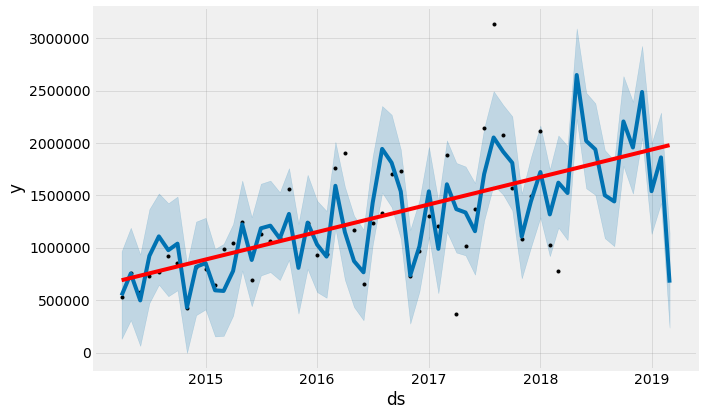

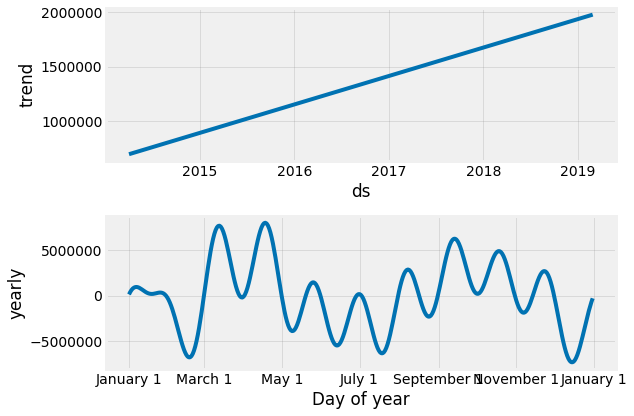

In [122]:
prophet=Prophet(seasonality_mode='additive',weekly_seasonality=False,daily_seasonality=False)
prophet.fit(df_prophet[df_prophet['ds'] <= pd.to_datetime('2018-03-01')])
future = prophet.make_future_dataframe(periods=12, freq= 'M')
forecast = prophet.predict(future)
fig = prophet.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), prophet, forecast)
plt.show()
fig2 = prophet.plot_components(forecast)
plt.show()

In [123]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-04-01,6.913034e+05,1.324599e+05,9.664088e+05,6.913034e+05,6.913034e+05,-1.453052e+05,-1.453052e+05,-1.453052e+05,-1.453052e+05,-1.453052e+05,-1.453052e+05,0.0,0.0,0.0,5.459982e+05
1,2014-05-01,7.128360e+05,3.106486e+05,1.191022e+06,7.128360e+05,7.128360e+05,4.208545e+04,4.208545e+04,4.208545e+04,4.208545e+04,4.208545e+04,4.208545e+04,0.0,0.0,0.0,7.549214e+05
2,2014-06-01,7.350863e+05,6.549170e+04,9.358379e+05,7.350863e+05,7.350863e+05,-2.365911e+05,-2.365911e+05,-2.365911e+05,-2.365911e+05,-2.365911e+05,-2.365911e+05,0.0,0.0,0.0,4.984952e+05
3,2014-07-01,7.566188e+05,4.742872e+05,1.369246e+06,7.566188e+05,7.566188e+05,1.670690e+05,1.670690e+05,1.670690e+05,1.670690e+05,1.670690e+05,1.670690e+05,0.0,0.0,0.0,9.236878e+05
4,2014-08-01,7.788691e+05,6.488439e+05,1.518383e+06,7.788691e+05,7.788691e+05,3.302037e+05,3.302037e+05,3.302037e+05,3.302037e+05,3.302037e+05,3.302037e+05,0.0,0.0,0.0,1.109073e+06
5,2014-09-01,8.011194e+05,5.387996e+05,1.425111e+06,8.011194e+05,8.011194e+05,1.764359e+05,1.764359e+05,1.764359e+05,1.764359e+05,1.764359e+05,1.764359e+05,0.0,0.0,0.0,9.775553e+05
6,2014-10-01,8.226520e+05,5.952407e+05,1.488462e+06,8.226520e+05,8.226520e+05,2.173782e+05,2.173782e+05,2.173782e+05,2.173782e+05,2.173782e+05,2.173782e+05,0.0,0.0,0.0,1.040030e+06
7,2014-11-01,8.449023e+05,-1.201564e+03,8.456633e+05,8.449023e+05,8.449023e+05,-4.125083e+05,-4.125083e+05,-4.125083e+05,-4.125083e+05,-4.125083e+05,-4.125083e+05,0.0,0.0,0.0,4.323940e+05
8,2014-12-01,8.664349e+05,3.584273e+05,1.249958e+06,8.664349e+05,8.664349e+05,-4.779039e+04,-4.779039e+04,-4.779039e+04,-4.779039e+04,-4.779039e+04,-4.779039e+04,0.0,0.0,0.0,8.186445e+05
9,2015-01-01,8.886852e+05,4.130419e+05,1.286147e+06,8.886852e+05,8.886852e+05,-3.412510e+04,-3.412510e+04,-3.412510e+04,-3.412510e+04,-3.412510e+04,-3.412510e+04,0.0,0.0,0.0,8.545601e+05


In [124]:
rmse = mean_squared_error(test['sales'],forecast.tail(15)['yhat'])
print(rmse)

733541327356.9384


In [125]:
resultsDf_8_6 = pd.DataFrame({'Test RMSE': [rmse],}
                           ,index=['Prophet'])

resultsDf = pd.concat([resultsDf, resultsDf_8_6])
resultsDf

,Test RMSE,Test MAPE
Simple Average,8.171829e+05,NaN
"Alpha=0.265,SimpleExponentialSmoothing",7.355966e+05,41.385303
"Alpha=0.1,SimpleExponentialSmoothing",7.271565e+05,41.519655
"Alpha=0.1,Beta=0.6,DoubleExponentialSmoothing",6.644852e+05,48.641981
"Alpha=0.07571,Beta=0.07571,Gamma=0.03423,TripleExponentialSmoothing",7.012369e+05,56.545818
"Alpha=0.7,Beta=0.5,Gamma=0.8,TripleExponentialSmoothing",6.059935e+05,48.567847
"ARIMA(3,0,2)",4.856785e+01,44.520812
"ARIMA(0,1,3)",4.856785e+01,44.520812
"SARIMA(0,1,0)(0,1,2)12",9.472411e+11,67.795837
Prophet,7.335413e+11,NaN


In [126]:
resultsDf.sort_values(by=['Test RMSE'],ascending=True)

,Test RMSE,Test MAPE
"ARIMA(3,0,2)",4.856785e+01,44.520812
"ARIMA(0,1,3)",4.856785e+01,44.520812
"Alpha=0.7,Beta=0.5,Gamma=0.8,TripleExponentialSmoothing",6.059935e+05,48.567847
"Alpha=0.1,Beta=0.6,DoubleExponentialSmoothing",6.644852e+05,48.641981
"Alpha=0.07571,Beta=0.07571,Gamma=0.03423,TripleExponentialSmoothing",7.012369e+05,56.545818
"Alpha=0.1,SimpleExponentialSmoothing",7.271565e+05,41.519655
"Alpha=0.265,SimpleExponentialSmoothing",7.355966e+05,41.385303
Simple Average,8.171829e+05,NaN
Prophet,7.335413e+11,NaN
"SARIMA(0,1,0)(0,1,2)12",9.472411e+11,67.795837


In [127]:
import fbprophet

In [128]:
m = fbprophet.Prophet()

In [129]:
m.fit(df_prophet)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [130]:
future = m.make_future_dataframe(periods=365)

In [131]:
forecast = m.predict(future)

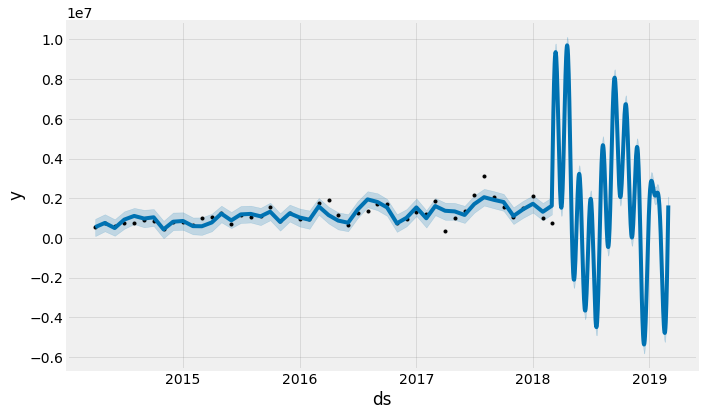

In [132]:
m.plot(forecast);

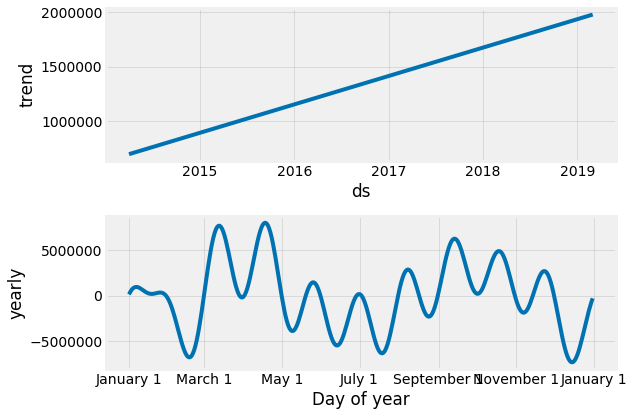

In [133]:
m.plot_components(forecast);

In [134]:
df_prophet.head()

,ds,y
Date,,
2014-04-01,2014-04-01,526894
2014-05-01,2014-05-01,759977
2014-06-01,2014-06-01,576708
2014-07-01,2014-07-01,728336
2014-08-01,2014-08-01,773037


In [135]:
future.tail()

,ds
408,2019-02-25
409,2019-02-26
410,2019-02-27
411,2019-02-28
412,2019-03-01


In [136]:
predict=m.predict(future)

In [137]:
predict

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-04-01,6.913034e+05,7.811966e+04,9.710370e+05,6.913034e+05,6.913034e+05,-1.453052e+05,-1.453052e+05,-1.453052e+05,-1.453052e+05,-1.453052e+05,-1.453052e+05,0.0,0.0,0.0,5.459982e+05
1,2014-05-01,7.128360e+05,3.031731e+05,1.185759e+06,7.128360e+05,7.128360e+05,4.208545e+04,4.208545e+04,4.208545e+04,4.208545e+04,4.208545e+04,4.208545e+04,0.0,0.0,0.0,7.549214e+05
2,2014-06-01,7.350863e+05,9.582094e+04,9.366128e+05,7.350863e+05,7.350863e+05,-2.365911e+05,-2.365911e+05,-2.365911e+05,-2.365911e+05,-2.365911e+05,-2.365911e+05,0.0,0.0,0.0,4.984952e+05
3,2014-07-01,7.566188e+05,5.056428e+05,1.334310e+06,7.566188e+05,7.566188e+05,1.670690e+05,1.670690e+05,1.670690e+05,1.670690e+05,1.670690e+05,1.670690e+05,0.0,0.0,0.0,9.236878e+05
4,2014-08-01,7.788691e+05,6.765309e+05,1.515842e+06,7.788691e+05,7.788691e+05,3.302037e+05,3.302037e+05,3.302037e+05,3.302037e+05,3.302037e+05,3.302037e+05,0.0,0.0,0.0,1.109073e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,2019-02-25,1.976797e+06,-2.380166e+06,-1.513109e+06,1.976797e+06,1.976797e+06,-3.926522e+06,-3.926522e+06,-3.926522e+06,-3.926522e+06,-3.926522e+06,-3.926522e+06,0.0,0.0,0.0,-1.949725e+06
409,2019-02-26,1.977514e+06,-1.578161e+06,-7.198199e+05,1.977514e+06,1.977515e+06,-3.119805e+06,-3.119805e+06,-3.119805e+06,-3.119805e+06,-3.119805e+06,-3.119805e+06,0.0,0.0,0.0,-1.142290e+06
410,2019-02-27,1.978232e+06,-7.028542e+05,1.692514e+05,1.978232e+06,1.978232e+06,-2.242725e+06,-2.242725e+06,-2.242725e+06,-2.242725e+06,-2.242725e+06,-2.242725e+06,0.0,0.0,0.0,-2.644932e+05
411,2019-02-28,1.978950e+06,2.338151e+05,1.104154e+06,1.978950e+06,1.978950e+06,-1.311069e+06,-1.311069e+06,-1.311069e+06,-1.311069e+06,-1.311069e+06,-1.311069e+06,0.0,0.0,0.0,6.678815e+05


In [138]:
predict[['ds','yhat','yhat_lower','yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2014-04-01,5.459982e+05,78119.659421,9.710370e+05
1,2014-05-01,7.549214e+05,303173.059047,1.185759e+06
2,2014-06-01,4.984952e+05,95820.936883,9.366128e+05
3,2014-07-01,9.236878e+05,505642.783063,1.334310e+06
4,2014-08-01,1.109073e+06,676530.915357,1.515842e+06


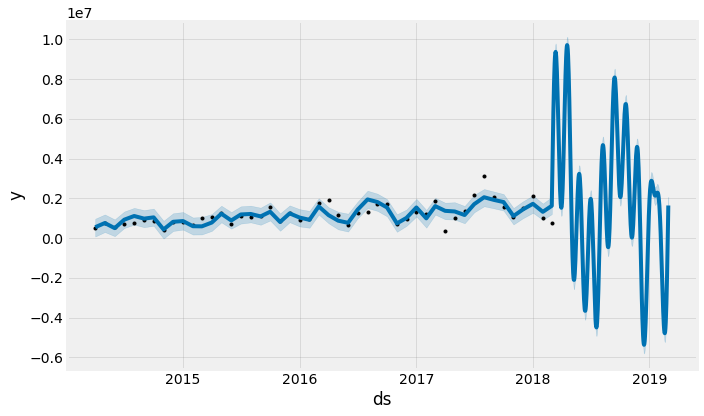

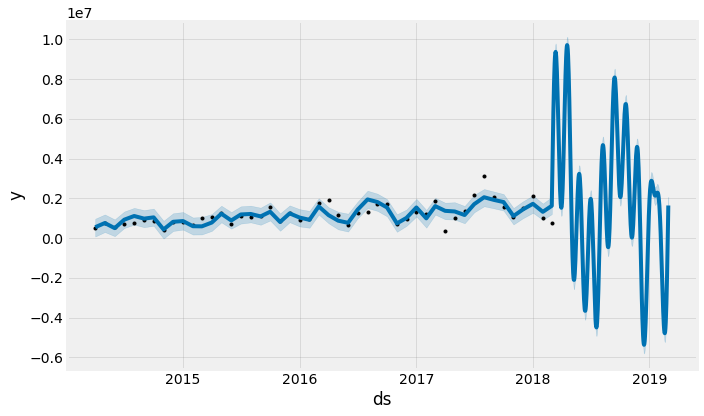

In [139]:
m.plot(predict)

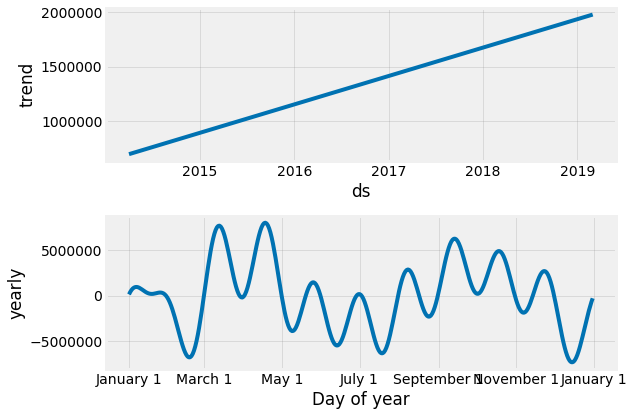

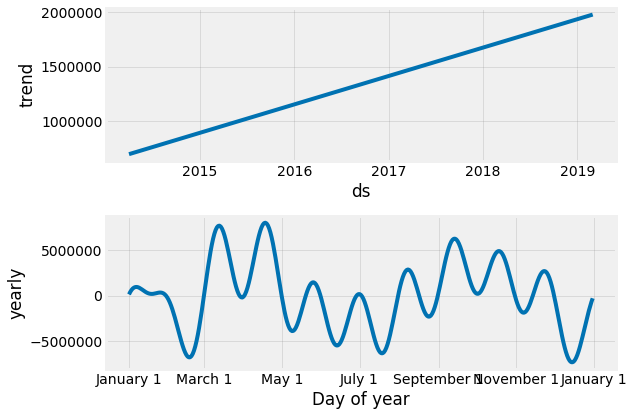

In [140]:
m.plot_components(predict)

In [141]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='730 days', period='180 days', horizon = '365 days')

INFO:fbprophet:Making 2 forecasts with cutoffs between 2016-09-02 00:00:00 and 2017-03-01 00:00:00


  0%|          | 0/2 [00:00<?, ?it/s]

INFO:fbprophet:n_changepoints greater than number of observations. Using 23.


In [142]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2016-10-01,1.467508e+06,1.342864e+06,1.598913e+06,1730803,2016-09-02
1,2016-11-01,1.272501e+06,1.143984e+06,1.404604e+06,730862,2016-09-02
2,2016-12-01,1.253550e+06,1.126653e+06,1.373936e+06,966831,2016-09-02
3,2017-01-01,1.479309e+06,1.355005e+06,1.616919e+06,1306082,2016-09-02
4,2017-02-01,7.512770e+05,6.316121e+05,8.740210e+05,1209905,2016-09-02


In [143]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,31 days,1.149051e+12,1.071938e+06,8.781019e+05,2.120196,2.120196,0.0
1,60 days,1.261075e+12,1.122976e+06,1.017274e+06,2.414683,2.414683,0.0
2,61 days,2.850664e+11,5.339161e+05,5.338594e+05,0.629960,0.629960,0.0
3,90 days,1.794838e+11,4.236553e+05,4.063993e+05,0.407690,0.407690,0.0
4,92 days,6.840420e+10,2.615420e+05,2.601934e+05,0.233309,0.233309,0.0


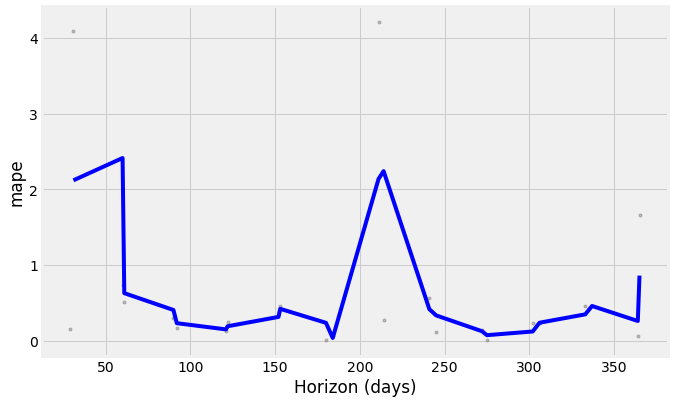

In [144]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')

In [27]:
import statsmodels.api as sm 
arma_mod30 = sm.tsa.ARIMA(GS_Mum['sales'], (0,1,3)).fit()

c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


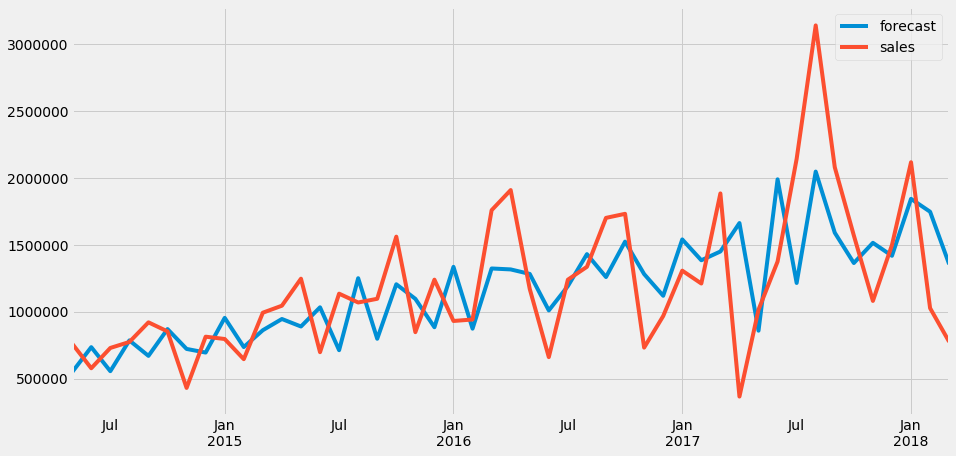

In [28]:
arma_mod30.plot_predict(dynamic=False)
plt.show()

In [147]:
from statsmodels.tsa.arima_model import ARIMA

# 1,1,2 ARIMA Model
model = ARIMA(GS_Mum.sales, order=(0,1,3))
model_fit = model.fit(disp=0)
print(model_fit.summary())

c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.sales   No. Observations:                   47
Model:                 ARIMA(0, 1, 3)   Log Likelihood                -676.928
Method:                       css-mle   S.D. of innovations         414683.903
Date:                Sat, 21 Aug 2021   AIC                           1363.855
Time:                        15:16:07   BIC                           1373.106
Sample:                    05-01-2014   HQIC                          1367.337
                         - 03-01-2018                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2.127e+04   4320.316      4.923      0.000    1.28e+04    2.97e+04
ma.L1.D.sales    -0.6709      0.182     -3.686      0.000      -1.028      -0.314
ma.L2.D.sales    -0.7011      0.182     

In [148]:
from statsmodels.tsa.stattools import acf

# Create Training and Test
train = GS_Mum.sales[:33]
test = GS_Mum.sales[33:]

c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


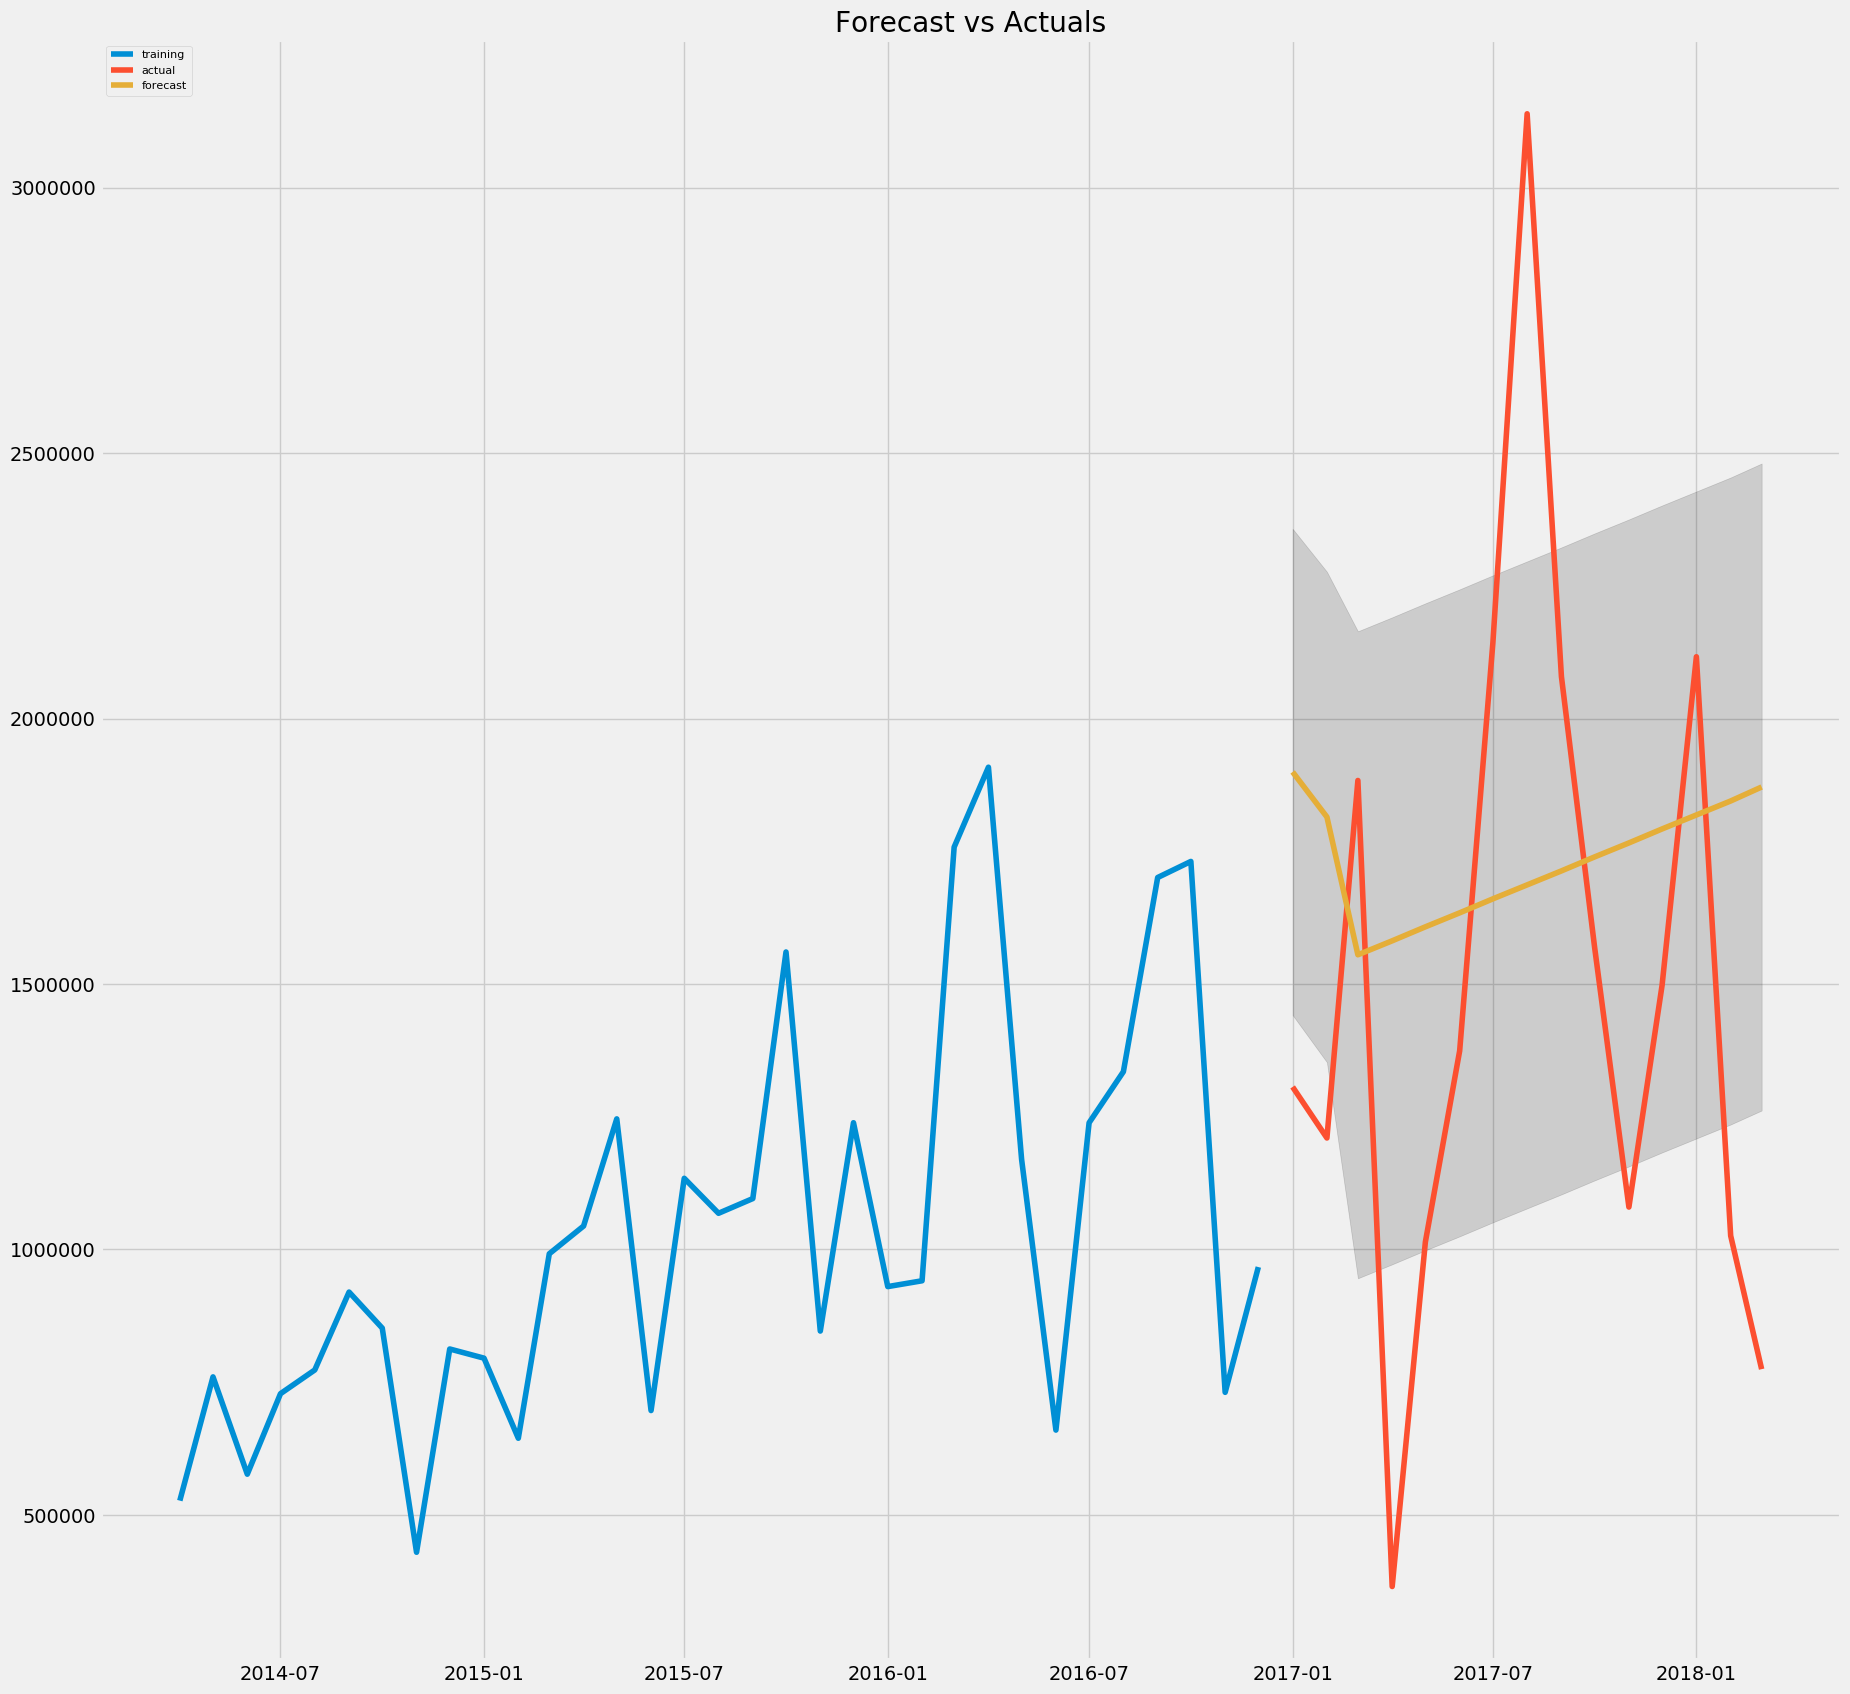

In [149]:
model = ARIMA(train, order=(0,1,3))  
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(15, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(20,20), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()